In [67]:
import numpy as np
import os
import glob
import ntpath
import pandas as pd
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random


# Corremos los tests

In [2]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_15_segundos.txt 0.9 > ./resultados/test_15_segundos.txt.out 2> ./resultados/test_15_segundos.txt.time


In [67]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_30_segundos.txt 0.8 > ./resultados/test_30_segundos.txt.out


In [68]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_aleatorio.txt 0.85 > ./resultados/test_aleatorio.txt.out


In [69]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_aleatorio_desordenado.txt 0.76 > ./resultados/test_aleatorio_desordenado.txt.out


In [70]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_completo.txt 0.5 > ./resultados/test_completo.txt.out


In [73]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_trivial.txt 0.5 > ./resultados/test_trivial.txt.out


In [74]:
!../cmake-build-debug/pageRank ../tests_docentes/tests_tp1/test_sin_links.txt 0.5 > ./resultados/test_sin_links.txt.out


In [76]:
def compare(docResults, ourResults):
    docResultsArr = [l.strip() for l in docResults]
    ourResultsArr = [l.strip() for l in ourResults]
    print(len(docResultsArr) == len(ourResultsArr))
    for i in range(len(docResultsArr)):
        print(i)
    

test_doc_path = '../tests_docentes/tests_tp1/'
for filename in glob.glob(os.path.join(test_doc_path, '*.txt.out')):
    with open(filename, encoding="utf-8") as docResults:
        basename = ntpath.basename(filename)
        with open('./resultados/'+basename) as ourResults:
            compare(docResults, ourResults)
        

True
0
1
True
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273


846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076

In [83]:
a = np.array([[ 1 , -0.283333 , -0.283333 , -0.283333 , 0 ]  , 
 [ 0 , 1 , 0 , 0 , 0 ]  , 
 [ -0.283333 , 0 , 1 , -0.283333 , 0 ]  , 
 [ -0.283333 , -0.283333 , -0.283333 , 1 , 0 ]  , 
 [ -0.283333 , -0.283333 , -0.283333 , -0.283333 , 1 ] ])
b = np.ones(5)
x = np.linalg.solve(a, b)
x
y = x / np.sum(x)
y

array([ 0.21930165,  0.07784444,  0.20211523,  0.21930165,  0.28143704])

In [13]:
def runProgram(p,input_file,out_path,out_path_time):
    !../cmake-build-debug/pageRank $input_file $p > $out_path 2> $out_path_time


test_doc_path = '../tests_docentes/tests_tp1/'
test_ours_path = './resultados/'
for filename in glob.glob(os.path.join(test_doc_path, '*.txt.out')):
    with open(filename, encoding="utf-8") as docResults:
        p = docResults.readline()
        out_path = test_ours_path + ntpath.basename(filename)
        out_path_time = our_path.replace('.out','.time')
        input_file = filename.replace('.out','')
        print(p + our_path + input_file)
        runProgram(p,input_file,out_path,out_path_time)
        
        
        
        
        

0.3
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_trivial.txt
3.431e-06;1.429e-06;5.18e-07;7.94e-07
0.3
1
0.9
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_15_segundos.txt
5.60706;1.75868;0.0629722;0.000350082
0.9
0.000476137
0.000808404
0.000477048
0.000911909
0.000394625
0.00046918
0.000334599
0.000426665
0.000791063
0.000765351
0.000287186
0.000400119
0.000286101
0.000661215
0.0005851
0.000410099
0.00054877
0.000494718
0.000578984
0.00037386
0.000708613
0.000570361
0.000665331
0.000568985
0.000483076
0.000467066
0.000853051
0.000883001
0.000869032
0.000680767
0.000889921
0.000616762
0.000423453
0.000434038
0.00051733
0.000663121
0.000501422
0.000675856
0.000379918
0.000755712
0.000644529
0.000232499
0.00055797
0.00082238
0.000500095
0.000492302
0.000640897
0.000359437
0.00106719
0.000586976
0.000836789
0.000506529
0.000766966
0.000461032
0.000396464
0.000410016
0.000492007
0.00101022
0.000622775
0.000459625
0.000755833
0.000554614
0.0010107
0.

0.64
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_sin_links.txt
5.7751e-05;4.4183e-05;8.194e-06;4.118e-06
0.64
0.2
0.2
0.2
0.2
0.2
0.5
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_completo.txt
0.000240016;0.00011003;0.000116888;5.79e-06
0.5
0.2
0.2
0.2
0.2
0.2
0.85
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_aleatorio.txt
9.497e-05;5.9572e-05;4.9028e-05;4.032e-06
0.85
0.220193
0.0793122
0.197721
0.220193
0.282581
0.8
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_30_segundos.txt
12.7941;3.87342;0.128551;0.000525738
0.8
0.000276029
0.000352836
0.00033496
0.000352229
0.000634891
0.000389497
0.000315478
0.000507262
0.00047441
0.000354173
0.000449128
0.000540477
0.000324307
0.00071928
0.00051386
0.000435127
0.000213864
0.000320267
0.000331802
0.000419796
0.00043544
0.000374516
0.000501527
0.000229889
0.000261392
0.000504797
0.000230558
0.000365034
0.000465549
0.000363383
0.000391745
0.000198467
0.000390116
0

0.76
./resultados/test_trivial.txt.out../tests_docentes/tests_tp1/test_aleatorio_desordenado.txt
2.4514e-05;1.4616e-05;1.2855e-05;1.1e-06
0.76
4.42908e-17
1.83745e-17
3.96359e-17
4.42908e-17
1


In [41]:
inputs_path = './inputs/'

def generateW(numberOfRows, percentageOfLinks):
    filename = inputs_path + str(numberOfRows) + "_" + str(percentageOfLinks) + ".txt"
    f = open(filename,"w+")
    
    f.write(str(numberOfRows) + '\n')
    numberOfLinks = int((numberOfRows**2) * percentageOfLinks)
    f.write(str(numberOfLinks) + '\n')
    
    for link in range(0,numberOfLinks):
        first = random.randint(1,numberOfRows)
        second = random.randint(1,numberOfRows)
        f.write(str(first) + " " + str(second) + "\n")
        
    
    f.close() 
    return filename


for i in range(20,501,20):
    for step in range(10,101,10):
        generateW(i, step/1000)
        
        
        
        



In [42]:
results_path = "./results/"
def refreshTimeResults():
    filename = results_path + "time"
    f = open(filename,"w+")
    f.write("Rows;Links;P;Multiplication_time;Adding_time;Gauss_time;Resolve_time \n")
    f.close()

refreshTimeResults()
for filename in glob.glob(os.path.join(inputs_path, '*.txt')):
    out_path = ntpath.basename(filename)
    param = "../experimentacion/inputs/"+out_path
    !../cmake-build-debug/pageRank $param 0.7

1.13967;0.113841;0.0871522;0.000537139
0.7
0.000656367
0.000791037
0.000577181
0.000152099
0.000961148
8.5394e-05
0.000778722
0.0003329
0.000277866
0.000603116
0.000338893
0.000524033
0.00032043
0.000499423
0.000358983
0.000315635
2.57923e-05
0.000494996
0.000337983
0.000447339
0.00071798
0.000279294
0.00060896
0.000268749
0.000663981
0.000654873
0.000500496
6.36477e-05
0.00101532
0.000971403
0.000274309
0.000489166
0.00101316
0.00056055
0.000532052
0.01385
0.000775643
8.30354e-05
0.000263218
0.00022679
0.000116699
0.000474603
0.000258093
0.000998558
0.000468735
0.000637986
0.000272186
0.000239715
0.0133987
0.000600447
0.0130732
0.00032144
0.000284669
0.000453418
0.00112042
0.000503597
0.00046942
0.000509641
0.000508287
0.000633387
0.000528955
0.000997723
0.000605479
5.38857e-05
5.3389e-05
0.000356938
0.000451318
0.000273032
0.000299292
0.000655757
0.0135346
4.40319e-05
4.30613e-05
0.000789272
0.00120132
0.000291897
0.000460436
0.000248739
5.29079e-05
0.000403986
0.00110368
0.00100069


0.383658;0.0811768;0.00940764;0.000158994
0.7
0.00250292
0.00258082
0.00207218
0.003006
0.00318554
0.00285189
0.00312584
0.00230759
0.00197569
0.00203024
0.00350362
0.00251447
0.00275742
0.00178011
0.0026956
0.00199343
0.00332193
0.00240347
0.00265791
0.00228901
0.00209199
0.00210082
0.00308142
0.00265771
0.00201586
0.00238347
0.00265167
0.00231258
0.00222024
0.00201207
0.00289072
0.00271624
0.00282951
0.00393634
0.00303437
0.00309973
0.00290345
0.00233335
0.0031406
0.00297647
0.00218603
0.00296808
0.002545
0.00237084
0.00271225
0.00308032
0.0024073
0.00200972
0.00320811
0.00207543
0.00249875
0.002077
0.00264218
0.00266517
0.00286202
0.00256923
0.00328856
0.00305247
0.00217509
0.00255385
0.00261871
0.00331748
0.00261175
0.00223189
0.00270445
0.00211936
0.00267931
0.00221585
0.00269327
0.00204808
0.00264556
0.00307426
0.00384656
0.00270222
0.00215317
0.00278665
0.00248267
0.00319118
0.00307288
0.00270546
0.00254123
0.00231111
0.00291652
0.0027246
0.00218028
0.00193323
0.00250783
0.00245

0.0400896;0.0124002;0.000843752;2.6155e-05
0.7
0.0063454
0.00575507
0.0059941
0.00416354
0.0041357
0.00891702
0.00414482
0.00738581
0.00643909
0.006701
0.00715098
0.00673222
0.00341409
0.00502875
0.00843042
0.0025871
0.00551714
0.00364163
0.00498135
0.007821
0.00776087
0.00345725
0.0029493
0.00498802
0.00386624
0.00817867
0.00345847
0.00743309
0.0062319
0.00713091
0.0118746
0.00493014
0.0127901
0.00638972
0.00659864
0.00813248
0.00536362
0.00798597
0.00408201
0.00345943
0.00686274
0.00405775
0.0088452
0.00781086
0.00807015
0.00541432
0.00319076
0.00757269
0.00713228
0.00311534
0.0125629
0.00319076
0.00605778
0.00478959
0.00595897
0.00639418
0.00557807
0.00733932
0.00653931
0.00607726
0.00394162
0.0055708
0.00802222
0.00907397
0.00518811
0.00428013
0.00539552
0.00533804
0.00413266
0.0029493
0.00341292
0.00765248
0.00349475
0.00601033
0.0053103
0.00653469
0.00735403
0.00895929
0.00459684
0.00987287
0.00352127
0.00603701
0.00319076
0.00496011
0.00450025
0.0025871
0.00465789
0.00355281
0.0

0.119697;0.0231237;0.00614914;8.0549e-05
0.7
0.00365106
0.00476879
0.00623453
0.00563639
0.00565072
0.00479718
0.00598428
0.00382509
0.00572511
0.00504384
0.00408265
0.00461565
0.00499056
0.00619214
0.00484287
0.00526116
0.00447899
0.00494826
0.0043457
0.0068152
0.00533258
0.00456234
0.00553229
0.00546419
0.00562831
0.00404605
0.00496391
0.00512974
0.00666948
0.00522071
0.0038006
0.00548552
0.00471856
0.00495478
0.00491979
0.00430799
0.00514477
0.00376379
0.00603706
0.00473302
0.00421215
0.00341174
0.00364264
0.00552623
0.00373909
0.00393054
0.00375945
0.00426273
0.00519706
0.00398881
0.00514796
0.00589798
0.00540659
0.00491848
0.00416373
0.00600567
0.00396986
0.00408104
0.0051696
0.00515389
0.00602474
0.00469525
0.00437221
0.00522324
0.00449626
0.00514173
0.00474552
0.00400341
0.00475471
0.0050658
0.00503358
0.0037616
0.0051738
0.00481397
0.00504508
0.00346672
0.00565989
0.00450768
0.00455412
0.0036765
0.00405781
0.00419313
0.00430738
0.0061187
0.00493929
0.00498178
0.00440779
0.00308

0.14695;0.0334901;0.00341031;6.5943e-05
0.7
0.00369719
0.00321188
0.00410136
0.00473114
0.0041926
0.00584416
0.00405302
0.00509578
0.00420418
0.003823
0.00550678
0.00412123
0.00608847
0.00388718
0.00342622
0.0038944
0.00445917
0.0050225
0.00385727
0.00414441
0.00271644
0.00279934
0.00428055
0.00230541
0.00323532
0.00383473
0.00239552
0.00423416
0.0057913
0.00343883
0.00545713
0.0029638
0.00437413
0.00297549
0.00386156
0.00439205
0.00369197
0.0043599
0.00476767
0.00214351
0.00329517
0.00277264
0.00364264
0.00493862
0.0037578
0.00359935
0.00364925
0.00409176
0.00248801
0.0051887
0.00192587
0.00422084
0.00323546
0.00359414
0.00338782
0.00284118
0.00363857
0.0029092
0.0052778
0.00440886
0.004358
0.00453719
0.00480504
0.00467724
0.00297264
0.00451695
0.00452647
0.00296967
0.00333353
0.00365522
0.00419908
0.00335026
0.00261029
0.00383342
0.00345311
0.00434196
0.00238658
0.00334773
0.00228901
0.00283021
0.00345441
0.00385898
0.00430282
0.00324408
0.00348666
0.00359301
0.00351602
0.0044619
0.0

0.0265719;0.0070594;0.000844519;2.3641e-05
0.7
0.0101217
0.00729879
0.0176967
0.0112527
0.0117926
0.00706468
0.0106844
0.00785192
0.0113192
0.0108685
0.0148438
0.00741436
0.0109995
0.00869262
0.0077116
0.00870605
0.00802916
0.00722939
0.00827255
0.0104122
0.0105513
0.00803597
0.0103899
0.00780998
0.00601882
0.00871849
0.00609951
0.0116022
0.00977293
0.0135054
0.0115141
0.0119761
0.011098
0.00892938
0.00696988
0.00750743
0.00866312
0.0118007
0.00827315
0.00528265
0.00598903
0.0108333
0.0139632
0.00875876
0.00983676
0.00442907
0.00609804
0.00465586
0.00747818
0.00687587
0.00825752
0.00481241
0.00879842
0.00735044
0.00549357
0.00855343
0.00899717
0.00756371
0.00669903
0.00646019
0.0100236
0.00519329
0.00916729
0.0106947
0.00882513
0.00941061
0.00751181
0.0105577
0.00875118
0.00850863
0.0083063
0.00882973
0.0102816
0.00851948
0.0120518
0.00847761
0.00551068
0.00842957
0.00473495
0.00791954
0.00931068
0.00808821
0.00619793
0.00487589
0.00896488
0.00629465
0.00829099
0.00690655
0.00649212
0.

0.235054;0.0622363;0.00466295;8.7009e-05
0.7
0.00410596
0.00351269
0.00393033
0.00164773
0.00358658
0.00226986
0.00354282
0.0028412
0.00298482
0.00265195
0.00313503
0.0018594
0.00218197
0.0023001
0.00344541
0.00334451
0.00382629
0.0031108
0.00319019
0.00329083
0.00233631
0.00320417
0.00195889
0.00346305
0.00306801
0.00270956
0.0023202
0.00250653
0.00187405
0.00260587
0.00465186
0.00250481
0.00236504
0.00302264
0.00319548
0.00335602
0.00332653
0.00229826
0.00216329
0.00215889
0.00365204
0.00314396
0.00276108
0.00364608
0.0028209
0.00255158
0.0023631
0.00288126
0.00255647
0.00439236
0.00333887
0.00333326
0.00310516
0.00236075
0.00278114
0.00362023
0.00239313
0.00349725
0.00252382
0.00173688
0.00337611
0.00283964
0.0033391
0.00372056
0.00134062
0.00299368
0.00292715
0.00297549
0.00279666
0.0020154
0.00432955
0.00274424
0.00282216
0.00233846
0.00265614
0.00355365
0.00300457
0.00310527
0.00408048
0.0015484
0.00320176
0.00481079
0.00271943
0.0020139
0.00362849
0.00289277
0.00295055
0.0024487

0.0282448;0.0066746;0.00201541;3.4713e-05
0.7
0.00853939
0.00877203
0.0100035
0.00721615
0.00971507
0.0093303
0.00698724
0.0119102
0.00945233
0.00995853
0.00833482
0.00892654
0.0110007
0.0089839
0.0100254
0.00893002
0.00853016
0.00873791
0.0115984
0.00695022
0.0123225
0.0118413
0.00750812
0.0108867
0.0104454
0.00797701
0.00773083
0.00861503
0.00819496
0.0076307
0.0112326
0.00801702
0.00517595
0.00809541
0.0120151
0.00585934
0.00848836
0.00840561
0.00736777
0.00780638
0.00728254
0.00751393
0.0111655
0.00898917
0.00886922
0.0110395
0.0090196
0.00727896
0.0080306
0.00917741
0.0109437
0.00666139
0.00796885
0.00759148
0.00721827
0.0095588
0.00710218
0.00622729
0.00783135
0.00832701
0.00947579
0.00950461
0.00819631
0.00761335
0.00793648
0.00896604
0.00890871
0.00885003
0.0107804
0.00617704
0.0103169
0.0105291
0.00667489
0.00840684
0.00560545
0.00897173
0.00767245
0.00967713
0.00901093
0.00814499
0.00854432
0.00726899
0.00787312
0.00635227
0.00535349
0.00782671
0.00695893
0.00892476
0.0067356

0.050635;0.00639734;0.00142393;2.9989e-05
0.7
0.00976812
0.00717475
0.0137091
0.00971806
0.0098354
0.00679319
0.00630045
0.00827849
0.00709496
0.00745606
0.0101823
0.00793965
0.0107923
0.0121533
0.00988457
0.0117548
0.00979506
0.00653872
0.0085149
0.00731175
0.0100086
0.00858039
0.00699988
0.0123117
0.00571872
0.00994751
0.00934968
0.0102522
0.0119944
0.00581038
0.00614528
0.00883722
0.00919621
0.00948668
0.0105762
0.0116662
0.0135067
0.00886369
0.0105067
0.0132492
0.0113034
0.0116875
0.0112454
0.00703796
0.00750248
0.00894437
0.00870082
0.00695017
0.00618056
0.0060847
0.00991883
0.00764423
0.0106257
0.00914408
0.0057565
0.00685842
0.00928398
0.00857165
0.00872489
0.00707112
0.00977239
0.00701957
0.00883661
0.00951898
0.00730882
0.00562837
0.00930729
0.00642438
0.00634107
0.00655341
0.0111834
0.00692167
0.00733691
0.00683464
0.00763678
0.00769361
0.00877096
0.00817564
0.00739749
0.00659906
0.0102788
0.00883893
0.00816054
0.00837761
0.00640466
0.00608951
0.00632353
0.00590003
0.00689272

0.940495;0.124724;0.0434079;0.000372896
0.7
7.50138e-05
0.000191671
0.000944524
0.000502877
0.00154363
0.000512221
0.000912435
0.000922462
0.000724939
0.000559898
0.000146352
0.00056577
0.000537001
0.000423568
0.000169061
0.00105288
0.0193913
0.000984017
0.000588182
4.57859e-05
0.000131836
0.000168118
0.000121206
0.000107351
0.0194096
0.000638881
0.000954131
9.90369e-05
0.00101364
0.000869385
0.000115269
0.000517177
0.0193903
0.000490486
8.88055e-05
0.000108519
0.00134957
6.36997e-05
0.000509629
0.000633317
0.000165049
0.00112911
0.000890966
0.000527256
0.000567413
8.13346e-05
5.97844e-05
9.95254e-05
0.000537776
5.48757e-05
0.000191604
4.12002e-05
0.000549991
6.33422e-06
3.61363e-05
0.000436762
0.000504009
5.49428e-05
0.000907231
0.00046058
0.000848188
0.000884352
6.31493e-05
0.000598632
0.000111288
8.43671e-05
0.00106644
8.57194e-05
6.31293e-05
0.000530654
2.76952e-05
0.000865844
0.000140525
0.0197152
0.000551318
8.66477e-05
0.000502511
0.000956481
3.46188e-05
7.6943e-05
0.00139317
8.

1.05624;0.135253;0.0482402;0.000394399
0.7
0.00078859
0.000660982
0.00104715
0.0015195
0.000821032
0.000126044
0.000693979
0.000374839
0.000383473
0.000661145
0.000371439
0.00042614
0.00019095
0.000444244
0.000871056
0.0114302
0.0006122
0.000653207
0.000658896
0.000519721
0.000918531
0.00166469
0.000456379
0.000519778
0.000334931
0.000390082
0.00135264
0.000469858
0.00122803
0.000762862
0.000529667
0.000820241
0.000211461
0.000654105
0.000493107
0.000462885
0.000994923
0.00061581
0.000462501
0.000440025
0.0114712
0.0113121
0.000944683
0.011811
0.00122158
0.000630257
0.00012462
0.000809935
0.000990568
0.000333835
0.00017185
0.000117934
0.00101095
0.000376731
0.000676234
0.000180228
0.000397447
0.000348803
0.000451029
0.00095656
0.000185049
0.000692404
0.000659717
0.000324362
0.000638112
9.54997e-05
0.000684452
0.000905295
0.00069164
0.00011484
0.000324595
0.000389216
0.000181283
0.000125784
0.000360259
0.000597339
0.000128661
0.000102269
0.000503899
0.000474011
0.000670877
0.000859249
0

0.225214;0.0344502;0.0121142;0.000128771
0.7
0.000443138
0.00116186
0.00227648
0.0011474
0.00191571
0.0224559
0.00174685
0.00195494
0.0222103
0.000885508
0.00197493
0.00134113
0.000570534
0.00122419
0.000477994
0.0011571
0.00015482
0.000460045
0.00107248
0.00205593
0.00329702
0.0218293
0.000296269
0.0016653
0.000485208
0.00114142
0.00314071
0.00198582
0.00104956
0.00076839
0.00339305
0.00082054
0.000871554
0.00318204
0.0228945
0.00344324
0.000229731
0.000366046
0.000845368
0.00114139
0.000954355
0.00184565
0.000230116
0.000885052
0.000304324
0.00228762
0.00100408
0.0023278
0.000798145
0.000181661
0.00106946
0.00180783
0.00136549
0.00105998
0.00104246
0.000175534
0.000929778
0.00104048
0.00192384
0.000962034
0.0015616
0.00115428
0.000148887
0.000926473
0.000750335
0.00165826
0.0217803
0.000168591
0.00262089
0.000813642
0.000255365
3.03015e-05
0.000306782
0.00020067
0.00202394
0.000160832
0.00089368
0.000191
3.92727e-05
9.02883e-05
0.00076545
0.000809902
0.00164789
0.000951788
0.00012144

0.083338;0.018097;0.00204889;4.6983e-05
0.7
0.00803164
0.00564369
0.00640406
0.00917555
0.00597649
0.00601449
0.00416967
0.00492097
0.00338002
0.00577585
0.00584
0.00629815
0.0048051
0.00492669
0.00519727
0.00423355
0.00430685
0.00669555
0.0089312
0.00549089
0.00542789
0.00575896
0.00573535
0.00398222
0.00341441
0.00490742
0.00353726
0.00363623
0.00367271
0.00566667
0.00366411
0.00590049
0.00528908
0.00551066
0.00571216
0.00566863
0.00605469
0.00580745
0.00698743
0.00639525
0.00565318
0.00616508
0.00463552
0.00473955
0.00576725
0.00444262
0.00637118
0.00464565
0.00636958
0.00572447
0.00477367
0.00440708
0.00500661
0.00415372
0.00606854
0.00539299
0.00486861
0.00766769
0.00552894
0.00550266
0.00461103
0.00417549
0.00496605
0.0043456
0.00513302
0.00608793
0.00465752
0.00778043
0.00554346
0.00648855
0.00391611
0.0060747
0.00449598
0.00470028
0.00361317
0.00371683
0.00696568
0.005708
0.00869835
0.00562373
0.00508444
0.00586861
0.00544255
0.00569171
0.00521287
0.00624897
0.00405676
0.006827

0.137098;0.0452924;0.0022191;4.3733e-05
0.7
0.00355728
0.00511691
0.0024298
0.00500057
0.00479784
0.00263579
0.00261842
0.00182896
0.00188671
0.00336368
0.0024038
0.00250055
0.00198488
0.00394666
0.00385013
0.00404532
0.00407721
0.004277
0.00392246
0.00358923
0.00355763
0.00338147
0.00247737
0.00220526
0.00197974
0.00272787
0.00315549
0.00267536
0.00275512
0.00213768
0.00207357
0.0027808
0.00299174
0.00409455
0.00312346
0.00431324
0.00738965
0.00311393
0.00239824
0.00392699
0.00332621
0.00313067
0.0020351
0.00295697
0.00210783
0.00319441
0.00430433
0.00393696
0.00294193
0.00297909
0.0055251
0.00447401
0.00255283
0.00248673
0.00168319
0.00271925
0.00175341
0.00240031
0.00462983
0.00299635
0.00267316
0.00234158
0.00501027
0.00332693
0.00263877
0.00179078
0.0023587
0.00437672
0.00232744
0.00193378
0.00270648
0.00609575
0.00330007
0.00517396
0.003015
0.0023907
0.00212031
0.0030746
0.00270243
0.00238322
0.00356814
0.00310374
0.00139062
0.00199101
0.00174546
0.00356463
0.00362162
0.00324683


0.104318;0.0209004;0.00272781;5.0375e-05
0.7
0.00503946
0.00513591
0.00565935
0.00493303
0.0077671
0.00623663
0.00444434
0.00663449
0.00327341
0.00537341
0.00556556
0.00421478
0.00484543
0.00555469
0.00480478
0.0049506
0.00632761
0.00386171
0.00561196
0.00368419
0.00462263
0.00695931
0.0047266
0.00521791
0.00593904
0.00494916
0.00523553
0.00405418
0.00507873
0.00495721
0.00647236
0.0044082
0.00323001
0.00303787
0.0069528
0.0046714
0.00535741
0.00672239
0.00667325
0.00365674
0.00569013
0.00539933
0.00640553
0.00493833
0.00461893
0.00555744
0.00439309
0.00360836
0.00312078
0.00436783
0.00346286
0.00519676
0.00438975
0.00355763
0.00358717
0.0030163
0.0040986
0.0046978
0.00491422
0.00485951
0.00448681
0.00644904
0.0034984
0.00454551
0.0039352
0.00337053
0.00503704
0.00506489
0.00403677
0.00393394
0.00518323
0.00667351
0.0031989
0.00482746
0.00416894
0.00534175
0.00495697
0.00340726
0.00509856
0.00455229
0.00608883
0.00408974
0.00526337
0.005329
0.00493899
0.00494626
0.00512452
0.00440475
0

0.0792024;0.0147372;0.0027502;5.2777e-05
0.7
0.00450233
0.00593821
0.00740557
0.00726876
0.00631704
0.00676236
0.00679173
0.00534157
0.00640587
0.00559386
0.00407083
0.00767882
0.00401774
0.00712058
0.00648994
0.00879175
0.00683403
0.00535127
0.00508975
0.00615374
0.00768348
0.00783168
0.0061355
0.00581666
0.00722543
0.00551444
0.00737131
0.00590222
0.0076633
0.00469746
0.00388956
0.00758324
0.00637403
0.00554552
0.00841539
0.00601635
0.00619419
0.00534412
0.00461909
0.00629524
0.00381953
0.00706244
0.00504885
0.00464791
0.00560335
0.00596809
0.00655261
0.00610947
0.00397231
0.00473694
0.0069257
0.00616046
0.00728758
0.00655225
0.00471723
0.00667144
0.00796414
0.00402747
0.00547773
0.00444318
0.00660508
0.00452432
0.00566047
0.00711187
0.00630323
0.00464124
0.00694867
0.00449438
0.00443136
0.00435866
0.00552806
0.00517874
0.00454579
0.00466926
0.00645422
0.00584992
0.00522245
0.00761643
0.005949
0.00499358
0.00563151
0.00493187
0.0060975
0.00563992
0.00688302
0.00482965
0.00469739
0.00

0.195605;0.0701777;0.00340556;6.1764e-05
0.7
0.00135151
0.0029112
0.00213524
0.00446983
0.00145422
0.00181722
0.00236461
0.00353331
0.00257646
0.00246538
0.00280074
0.00228551
0.00183752
0.00161703
0.00148807
0.00193281
0.00176486
0.00428574
0.00145811
0.00446116
0.00301855
0.00331303
0.00275635
0.0034272
0.00378354
0.00683462
0.00206191
0.00173313
0.00252386
0.0020904
0.00110676
0.00269674
0.00157886
0.00307456
0.00272426
0.00255002
0.00180811
0.00185146
0.00300553
0.0033438
0.00280572
0.00212732
0.00301645
0.0030259
0.00332299
0.00151611
0.0019708
0.00362263
0.00200006
0.00399313
0.00265291
0.00369382
0.00194386
0.00403573
0.00225594
0.00349001
0.00238375
0.00283511
0.00273324
0.00176166
0.00221131
0.00140911
0.00373005
0.00211608
0.0017034
0.0023791
0.00213131
0.00319352
0.00306239
0.00259237
0.00253183
0.00312505
0.00223516
0.00282668
0.00340268
0.00295485
0.00263978
0.00339063
0.00178083
0.00285915
0.0020959
0.00235928
0.00282923
0.00169146
0.00206653
0.00325475
0.0015533
0.002213

0.0669014;0.0150404;0.00351473;5.4035e-05
0.7
0.00609702
0.00721931
0.00573564
0.00972168
0.00497973
0.00554185
0.0077141
0.00538906
0.00566522
0.00599775
0.00465041
0.00680674
0.00630828
0.00683626
0.00719387
0.00576919
0.00568807
0.00790425
0.00523927
0.00589764
0.00785402
0.00691511
0.00665243
0.00584301
0.00572223
0.00649543
0.00620794
0.00724114
0.00628755
0.00536629
0.00716107
0.00589768
0.00368687
0.00689823
0.00608838
0.00727279
0.00525311
0.00620725
0.00621652
0.00582733
0.00486936
0.00574198
0.0062947
0.00617653
0.00677198
0.00724746
0.00568729
0.00569997
0.00566433
0.006041
0.00758853
0.005313
0.00469913
0.00517044
0.00638548
0.0060415
0.00585493
0.00435095
0.00503925
0.00600345
0.00683563
0.00520122
0.00587143
0.00487145
0.00573903
0.00557872
0.00401713
0.00434736
0.00635017
0.00613348
0.00514485
0.00450725
0.00454111
0.00548951
0.00480406
0.00605917
0.0060076
0.00466765
0.00472021
0.0067913
0.00496734
0.00534323
0.00764283
0.00478239
0.00495411
0.00503458
0.00393
0.0050996

0.493268;0.0817164;0.0187353;0.000223621
0.7
0.00296054
0.00328652
0.00339602
0.00297195
0.00222302
0.00233551
0.00217728
0.00309205
0.00254188
0.00242045
0.0023578
0.00190382
0.00266904
0.00314456
0.00268347
0.00289077
0.00261059
0.00269531
0.00240635
0.00289493
0.00290533
0.0034832
0.00386993
0.00215508
0.00198563
0.0028606
0.00228832
0.00271081
0.00299303
0.00338848
0.00264445
0.00238914
0.002794
0.00336173
0.00253606
0.00265432
0.00231453
0.0036834
0.00282629
0.00290575
0.00302295
0.00255545
0.00238877
0.003066
0.00252108
0.00191587
0.00321241
0.00290715
0.0028099
0.00302477
0.00277152
0.00273341
0.00251756
0.00281331
0.0022974
0.00270545
0.00310209
0.00250653
0.00265779
0.00273256
0.00208851
0.00260747
0.00242934
0.00246052
0.002317
0.0026628
0.00301481
0.00220538
0.00266447
0.0019828
0.00228456
0.00265595
0.00280944
0.00240053
0.00317841
0.0024172
0.00277576
0.0023775
0.00335433
0.0035238
0.00276712
0.00316086
0.0028201
0.0026396
0.0030616
0.00278229
0.00235876
0.00278747
0.00226

0.202177;0.0366173;0.00707916;0.000109399
0.7
0.00363736
0.00272135
0.00419308
0.00413378
0.00457901
0.00354031
0.00286548
0.00447483
0.0036195
0.00432273
0.00289534
0.00364741
0.00377448
0.00361526
0.00345754
0.00398759
0.00430736
0.00310772
0.00529968
0.00391634
0.00340053
0.00464855
0.00324117
0.00423433
0.00314118
0.00368752
0.00355562
0.00368568
0.00481754
0.00368711
0.00301913
0.00382971
0.00332473
0.00414397
0.00476423
0.00434483
0.00411865
0.00393406
0.00303709
0.003845
0.00304853
0.00319932
0.00382565
0.00305429
0.00424517
0.00456247
0.00426557
0.00433326
0.00355405
0.0047755
0.00341318
0.00361521
0.00506274
0.00429019
0.00381022
0.00332746
0.00362977
0.00422368
0.00344372
0.00396006
0.00370605
0.00406661
0.00423577
0.00449478
0.00356686
0.00397132
0.00327241
0.00376919
0.00387263
0.00568642
0.00363537
0.00450706
0.0036115
0.00445424
0.00391695
0.0037844
0.00403604
0.00287068
0.00407874
0.00404434
0.0024351
0.00398593
0.00395057
0.00385172
0.00405315
0.00410795
0.00328469
0.00

0.473406;0.0682367;0.0245819;0.000242828
0.7
0.00101224
0.000729697
0.00122102
0.000785023
0.000191411
0.000831169
0.000146331
0.000811936
0.000551102
0.00103047
0.000613495
0.000649722
0.000323758
0.000550788
0.000712367
0.000725793
0.000678499
0.00166875
0.000715088
0.000823157
0.00017289
0.000112707
0.000800591
0.000572927
0.000601898
0.000154102
0.000668094
8.18969e-05
0.000881804
0.00127761
0.000555554
0.000201506
0.00139107
0.000141673
0.00106194
0.000447253
8.19586e-05
0.000507414
0.00100283
0.000630591
0.00100904
0.000174875
0.000472919
0.000457564
0.00152215
0.00174708
9.04731e-05
0.000706591
0.00147398
0.000629174
0.00122971
0.00046868
7.23323e-05
0.00156065
0.000439985
0.000127686
9.39311e-05
3.65949e-05
9.8566e-05
0.000732406
9.59143e-05
0.000109901
0.0010365
0.0011098
9.72133e-05
0.00160593
0.000749102
0.000504614
0.00106235
0.000115122
0.000656982
0.00135854
0.00102541
0.000254554
0.000117457
0.000597097
0.000447833
0.00143484
0.0023285
4.72322e-05
0.000835783
0.000911708

1.36002;0.143915;0.0826924;0.000544478
0.7
0.00226272
0.00227421
0.00205514
0.00209023
0.0020908
0.00228005
0.00244284
0.00239933
0.00236184
0.0025642
0.0020246
0.00231391
0.00190859
0.00254399
0.00232686
0.00211129
0.00237544
0.00243878
0.00201753
0.00200384
0.00190998
0.0023955
0.00212675
0.0019318
0.00221206
0.00227981
0.00198509
0.00233882
0.00248754
0.00289043
0.00248951
0.00243694
0.00255014
0.00214714
0.00229894
0.00212769
0.00192951
0.00231963
0.00249286
0.00247558
0.00198042
0.00220781
0.00228895
0.00199336
0.00234505
0.00238952
0.00218306
0.00239927
0.00202701
0.00216952
0.0019022
0.00202157
0.00194927
0.00265904
0.00191655
0.00178597
0.00206325
0.00212219
0.00188984
0.00195952
0.00222233
0.00217543
0.0022045
0.00230354
0.00206556
0.00215768
0.00199932
0.00205826
0.00226221
0.00229488
0.00215429
0.00200224
0.00236575
0.0019957
0.00218848
0.00209715
0.00221239
0.00229935
0.00203422
0.00226421
0.00208574
0.00207525
0.00233059
0.00221229
0.00217697
0.00224375
0.00212964
0.002336

0.234224;0.051825;0.00557904;9.9349e-05
0.7
0.00380355
0.00339723
0.00343718
0.00381288
0.00227772
0.00487535
0.00249642
0.00203689
0.00419791
0.00327519
0.00303455
0.00244774
0.00295593
0.00333915
0.00285763
0.00245124
0.00376659
0.00322771
0.00313428
0.00392985
0.00339957
0.00225698
0.0033425
0.00397412
0.00399274
0.00412854
0.00327479
0.00341966
0.00293191
0.00294946
0.00403445
0.0027962
0.00354473
0.00337146
0.0031901
0.00275753
0.00287136
0.00372743
0.00337197
0.00307564
0.00250364
0.00252634
0.00312112
0.00275534
0.0038531
0.00312167
0.00197761
0.00264761
0.00331231
0.00497986
0.0036185
0.00288385
0.00261223
0.00385457
0.00262974
0.0032485
0.0035189
0.0025923
0.00308119
0.00363516
0.00295087
0.0026996
0.00274187
0.00347257
0.00302204
0.0026056
0.00221086
0.00442265
0.00298616
0.00288691
0.00466007
0.00260677
0.00601659
0.0040224
0.00346714
0.00269643
0.00190078
0.00340379
0.00319278
0.00372824
0.00298576
0.00395312
0.00294758
0.00338156
0.00306143
0.00285611
0.00309367
0.00255382

0.00514723;0.00259076;0.000316386;1.8571e-05
0.7
0.0465682
0.0218908
0.0314304
0.0173839
0.0313265
0.0179154
0.0351613
0.0234422
0.012877
0.012877
0.0278036
0.0338185
0.012877
0.012877
0.0294892
0.0167078
0.012877
0.0218908
0.012877
0.0398471
0.0215932
0.0206475
0.0331757
0.0432489
0.0378011
0.0248147
0.0300367
0.0222016
0.0278286
0.0206475
0.0354867
0.0295255
0.0180563
0.0263365
0.0167078
0.012877
0.0151304
0.0196317
0.029596
0.042719
0.0623966;0.0128505;0.00453362;6.1064e-05
0.7
0.00752824
0.00552809
0.00813417
0.00573118
0.00532937
0.00813379
0.00952047
0.00672038
0.0067756
0.00557002
0.00719448
0.00743359
0.007622
0.00688067
0.00615194
0.0064078
0.00675807
0.00837778
0.00772741
0.00490416
0.006382
0.00506558
0.00567063
0.00784481
0.00812206
0.00765374
0.00671472
0.00719063
0.00575972
0.00526546
0.00556812
0.00713067
0.00700853
0.00682339
0.00857873
0.00633794
0.00639979
0.00651867
0.00772459
0.00700268
0.0068754
0.00705142
0.00766438
0.00773071
0.00640719
0.00562347
0.00547581
0.00

0.102127;0.0158135;0.00544556;6.8869e-05
0.7
0.00526586
0.00604108
0.00730421
0.00573441
0.00797646
0.00653418
0.00819589
0.00591897
0.00452755
0.00730685
0.00568351
0.00761717
0.00820132
0.00665997
0.00574774
0.00408501
0.00586074
0.00707246
0.00683506
0.0065116
0.00543555
0.00601092
0.00513422
0.0060233
0.00646717
0.00766258
0.0066026
0.00559634
0.0064274
0.0065513
0.00621972
0.00701094
0.00516871
0.00608174
0.00520362
0.00432851
0.00592841
0.00527217
0.00495343
0.00501442
0.00463817
0.00562809
0.00538465
0.00604577
0.0050705
0.00513821
0.00795027
0.00589143
0.00541467
0.00646427
0.00534832
0.00593932
0.00622346
0.00621612
0.00664349
0.00615642
0.00557658
0.005046
0.00732098
0.00599898
0.00543076
0.00701603
0.00611005
0.00491664
0.00345878
0.00563768
0.00696602
0.00642971
0.00623006
0.00613346
0.00674429
0.00596529
0.00545864
0.00424959
0.00476876
0.00623562
0.00393294
0.00707933
0.00528132
0.00487504
0.00556723
0.00467389
0.00364825
0.00461924
0.00520503
0.00446549
0.0044921
0.00548

0.151926;0.0358082;0.00500612;8.8614e-05
0.7
0.00461266
0.00400735
0.00468327
0.00307498
0.00512699
0.00437012
0.00464157
0.00473817
0.00474892
0.00344763
0.00292935
0.00338173
0.00510925
0.00545122
0.00352717
0.00391194
0.0044249
0.00471263
0.00373086
0.00339802
0.0043494
0.00364512
0.00348816
0.00357379
0.00517583
0.00322127
0.00260153
0.00344132
0.00362122
0.00418796
0.00424066
0.00335097
0.00367951
0.00419312
0.00352505
0.00364546
0.00439711
0.00482715
0.0038689
0.00253346
0.00241439
0.00376
0.00512665
0.00323146
0.00438412
0.00335654
0.00286686
0.00434054
0.00371372
0.00349234
0.00354726
0.00465951
0.00478384
0.0048936
0.00367908
0.00401661
0.00595594
0.00325992
0.00374352
0.00293291
0.00435064
0.00417254
0.00531734
0.00441538
0.00310426
0.00430638
0.00291989
0.00355316
0.00549872
0.0044127
0.0038091
0.00295846
0.00275886
0.00366248
0.00382326
0.00301894
0.00309676
0.00405695
0.00374863
0.00486315
0.003517
0.00328605
0.00313902
0.00546583
0.00427545
0.00301833
0.00318169
0.0029087

0.533744;0.0703494;0.0320365;0.000263861
0.7
0.000514801
0.00776876
0.000820193
0.000274364
0.00726624
0.001003
0.000807614
0.000638058
0.00716573
0.000400998
0.000695061
0.00711642
0.00719658
0.000987806
0.000939268
0.00083
0.00106912
0.000472447
0.000525086
0.00119662
0.000668168
0.00120485
0.00126701
0.000730828
0.00767717
0.000622713
0.000931047
0.00697559
0.00137288
0.000768023
0.000542776
0.0007407
0.000414603
0.000923126
0.00797127
0.000576115
0.000268736
0.000740616
0.000920567
0.000529593
0.000515102
0.000136261
0.000790466
0.000934374
0.000843119
0.000719653
0.00070265
0.00114381
0.000901639
0.00110108
0.000412514
0.00761937
0.000660082
0.000500649
0.00049169
0.000853799
0.000665786
0.000665057
0.000415059
0.00081676
0.00748908
0.00123855
0.00137842
0.000161304
0.000865934
0.000317377
0.000642616
0.00781322
0.000506242
0.000649621
0.00102945
0.000269753
0.000885277
0.00122208
0.000841018
0.00045192
0.000513384
0.00759151
0.000396569
0.000351972
0.00777627
0.000430467
0.000623

0.635961;0.0735735;0.0473009;0.000329093
0.7
0.00320003
0.00259636
0.00326094
0.00297027
0.00298282
0.00325996
0.0027532
0.00336702
0.00326677
0.00305109
0.00247969
0.00322674
0.00271279
0.00339562
0.00333391
0.00304704
0.00286128
0.00273026
0.00235456
0.00312522
0.00328558
0.00290586
0.00326727
0.00312886
0.0034183
0.00326012
0.00336737
0.00358701
0.0032825
0.00303222
0.00334788
0.00324085
0.00338388
0.00280938
0.00353897
0.0026025
0.0029719
0.00294565
0.00287911
0.0033732
0.00281075
0.00347711
0.00304564
0.0025628
0.00300026
0.00341869
0.00273326
0.00303431
0.00285745
0.0030391
0.00326738
0.00284134
0.00271641
0.00288075
0.00345707
0.00336757
0.00306491
0.00285105
0.00297276
0.00318075
0.00349987
0.00303391
0.00268402
0.00341279
0.00240379
0.00314055
0.00267651
0.00286734
0.00276088
0.00305466
0.00349897
0.00311504
0.00355949
0.00262243
0.00312488
0.00320535
0.00303266
0.0025752
0.00253315
0.00271218
0.003431
0.00292609
0.00335735
0.00282962
0.0029467
0.00299154
0.00272483
0.00299029

0.254393;0.0362158;0.0177629;0.000169583
0.7
0.00107799
0.00139598
0.0012132
0.000833483
0.00153764
0.0010391
0.000747585
0.00136208
0.0026975
0.00137948
0.00107672
0.000843156
0.00123772
0.00125827
0.00130831
0.00236251
0.000906651
0.000951367
0.00026855
0.00128075
0.00106155
0.0012474
0.00114977
0.000862799
0.00141187
0.0166968
0.00167579
0.00158677
0.00181034
0.00188296
0.000885209
0.00230256
0.000864987
0.00337724
0.000374361
0.00159836
0.0178815
0.000870179
0.00103982
0.00135284
0.000838506
0.00130763
0.0169631
0.000303849
0.000977382
0.000949443
0.00144121
0.000941993
0.00125598
0.000791204
0.00104734
0.000581475
0.00145814
0.000706289
0.00138353
0.00148352
0.000606278
0.00156819
0.00172319
0.000586729
0.00221296
0.00111359
0.000775753
0.000776854
0.00145612
0.0011991
0.000640722
0.00252959
0.000223582
0.000391616
0.000683152
0.000855279
0.00124604
0.00153998
0.00136601
0.00212761
0.00149252
0.000951617
0.0014178
0.000720001
0.000380623
0.00124
0.00136291
0.000534295
0.00229549
0

0.0731974;0.0190528;0.0013783;3.2698e-05
0.7
0.00797723
0.0038318
0.00278288
0.00906336
0.00486118
0.00557132
0.00719569
0.00425268
0.00316898
0.00605411
0.00405247
0.00722113
0.00566432
0.00664372
0.00694112
0.00521263
0.00575296
0.00516847
0.0044792
0.00932121
0.0033318
0.00323618
0.00471536
0.00566608
0.00458829
0.00702536
0.00455609
0.00385018
0.00678577
0.00818114
0.00209887
0.0106208
0.00615793
0.00585671
0.00553906
0.00404158
0.00409006
0.00622184
0.00344684
0.00499106
0.00416444
0.00622814
0.00290782
0.0050396
0.00438407
0.00599512
0.00234374
0.00355573
0.00516539
0.00618956
0.00369973
0.00272605
0.010065
0.0052517
0.00319049
0.00474195
0.00577112
0.00270941
0.00819611
0.00542008
0.00442034
0.00649779
0.00434255
0.00281543
0.00339351
0.00636922
0.00513368
0.00613525
0.00335784
0.00598103
0.0077156
0.00411743
0.00477356
0.00561029
0.00486168
0.00277079
0.00481224
0.00408145
0.00450847
0.00538376
0.00586291
0.00277274
0.00414441
0.00529857
0.00411142
0.00419857
0.00575458
0.00406

0.00217166
0.00197207
0.00213383
0.00244831
0.0021746
0.0018107
0.00232943
0.00196656
0.00195282
0.0021023
0.0024118
0.00220645
0.00227116
0.00199678
0.00207901
0.0022218
0.00200736
0.00230276
0.00218056
0.00220374
0.00174968
0.00186453
0.00199025
0.00218138
0.00199776
0.00227147
0.00208941
0.00235852
0.00209095
0.00208796
0.00190394
0.00197104
0.00229425
0.0020377
0.00245707
0.00209166
0.00191664
0.0019771
0.00202986
0.00189083
0.00243175
0.00195564
0.00215051
0.00195964
0.00238767
0.00206887
0.00176907
0.00233834
0.00195025
0.00253765
0.00216928
0.00200049
0.0020929
0.00211979
0.00188421
0.00222485
0.00226839
0.00202847
0.00245483
0.00189295
0.00193948
0.00212665
0.00226324
0.00197422
0.00197353
0.00222008
0.00221914
0.00206004
0.00236443
0.00183261
0.00256762
0.00222856
0.00189351
0.00194421
0.00212719
0.00204903
0.0018727
0.00227142
0.00210874
0.00190096
0.00179201
0.00157735;0.000816422;0.000107775;5.952e-06
0.7
0.011893
0.0172811
0.0649578
0.0205703
0.025894
0.0325113
0.0367372
0

0.637438;0.0856182;0.0352851;0.000308126
0.7
0.00107535
0.00052766
0.0151597
0.00065793
0.00192806
0.000486128
0.00020285
0.000363481
0.000138286
7.71654e-05
0.000448026
0.000554424
0.0149313
0.000526475
0.00110451
0.000711907
0.000575085
0.000937128
0.00118613
0.000873744
0.000628251
0.000585259
0.000720152
0.000191568
0.000126622
0.00057161
0.000961333
0.000647608
0.000943526
0.000151114
0.000480728
0.000369212
0.000402048
0.014885
0.000958328
0.000545591
0.00196777
0.0154786
0.00134979
0.000466054
0.0010333
0.000355513
0.00133914
0.00134563
0.000567422
0.000665912
0.000130959
0.00137049
0.000481733
0.000554054
0.000968796
0.000431155
0.000102974
0.000972996
0.000506542
0.000157001
5.4057e-05
0.000169117
0.0017181
0.000523749
0.0144793
0.000163672
0.000374064
0.00086784
0.000507318
0.000555229
0.000836266
0.000848014
0.000474972
0.000411937
0.000473243
8.96204e-05
0.0149719
0.0145502
9.82844e-05
0.000520673
0.000773734
8.36027e-05
0.000115141
0.000424715
0.000560666
9.70159e-05
0.000

0.0754142;0.0164958;0.00158015;3.4179e-05
0.7
0.00579995
0.00394353
0.00547553
0.00869921
0.00819843
0.00420048
0.00734819
0.00458912
0.00518539
0.00644876
0.00549911
0.00447721
0.00699551
0.0036047
0.00548986
0.01122
0.00793748
0.00490193
0.00511676
0.00919536
0.00657364
0.0066158
0.00502797
0.00512524
0.00616249
0.00485223
0.00548518
0.00363441
0.00513483
0.0051811
0.00608573
0.00626215
0.00494241
0.00334849
0.00399868
0.0059157
0.00447082
0.00483853
0.00531295
0.00693229
0.00481688
0.00554824
0.00313995
0.00477626
0.00226874
0.00561816
0.00440434
0.00428825
0.00402251
0.0050754
0.00467201
0.00304252
0.0044355
0.00669508
0.00366036
0.00305879
0.00490257
0.00496478
0.00423736
0.00405118
0.00312491
0.00360877
0.00702552
0.00573091
0.00615911
0.00578342
0.00392236
0.00485924
0.00548728
0.00593554
0.00381581
0.00616329
0.00450255
0.00357876
0.00351565
0.00434495
0.00442837
0.00334866
0.00710007
0.00517686
0.00384114
0.00376898
0.00694349
0.00364005
0.00473941
0.00685232
0.0049573
0.00362

0.342816;0.0524841;0.0173629;0.000199355
0.7
0.000238947
0.00134994
5.691e-05
0.00113274
0.000176261
0.00121607
7.1531e-05
3.86622e-05
0.00119282
0.000160167
0.000175366
7.8134e-05
3.60996e-05
0.00187253
0.028326
5.7608e-06
0.00224304
3.38723e-05
0.00102836
0.00363397
9.88763e-05
8.76966e-05
0.000173557
0.000282668
0.00125224
0.00110547
0.00094656
0.000109307
0.000949347
0.00226595
0.00236167
0.00016991
0.00218517
0.00225085
0.000824125
2.53046e-06
0.000162615
7.24191e-05
0.000125045
0.0284141
5.37919e-05
0.000125599
9.36736e-05
0.00101496
0.00161447
0.000111779
8.03082e-05
8.72226e-06
0.00101646
0.00204471
0.00315287
0.000130207
-2.36687e-18
0.0283878
6.92169e-05
0.000113091
0.0283568
0.000976915
2.56124e-05
8.60139e-05
4.54823e-05
0.00231893
0.000108256
0.0283102
0.000882497
0.000886549
7.37286e-06
0.02828
5.80923e-07
0.000144765
6.31128e-05
4.66979e-06
0.00228675
2.89466e-05
3.0634e-05
0.000135946
5.89177e-05
0.000915798
6.87266e-05
0.000941137
0.00107808
0.000952758
2.86108e-05
7.9

0.022436;0.00403629;0.000852027;2.2971e-05
0.7
0.0143633
0.0159457
0.0144377
0.00908764
0.0167122
0.0118781
0.0117961
0.0189056
0.0164643
0.0118732
0.0219277
0.00689466
0.0140217
0.017417
0.0153155
0.00876177
0.013315
0.0143544
0.0137162
0.0200051
0.0133629
0.0126256
0.0161048
0.0127995
0.01231
0.0153309
0.0153343
0.0155591
0.00964329
0.0167221
0.0152263
0.0116247
0.00664188
0.0120854
0.0131653
0.0121057
0.014616
0.00972953
0.0133786
0.0103577
0.0128221
0.00895354
0.00779707
0.00877589
0.0126752
0.00764302
0.0158866
0.00699459
0.0090567
0.00910182
0.0122413
0.00731837
0.0093573
0.0164612
0.00825582
0.0109484
0.0111035
0.0173586
0.0117131
0.0118912
0.0121095
0.0113994
0.0151858
0.0146401
0.0169028
0.0097604
0.0125022
0.0108552
0.0116879
0.00941988
0.0109736
0.00838163
0.0136051
0.00933493
0.0123852
0.00946653
0.0107078
0.0105332
0.0180914
0.0097857
0.451932;0.0619557;0.0261392;0.000243209
0.7
0.00381595
0.00305547
0.00284008
0.00325661
0.00294953
0.00319446
0.00392548
0.00295372
0.00331

0.0308806;0.00745757;0.000368012;1.4282e-05
0.7
0.0143456
0.0304087
0.00867308
0.00508991
0.00632849
0.00760853
0.00708812
0.0151784
0.00508991
0.0212348
0.0164455
0.00508991
0.00896774
0.0138829
0.0143321
0.0105602
0.0136558
0.0163142
0.016236
0.00874934
0.00728705
0.0074707
0.0114537
0.0101005
0.00598064
0.00655467
0.00813257
0.0120614
0.011593
0.00679511
0.00871545
0.0242871
0.00803675
0.0168778
0.00508991
0.0149519
0.00965958
0.00508991
0.00580249
0.0107941
0.00997334
0.00508991
0.00726163
0.00508991
0.00508991
0.00780665
0.00940582
0.00655388
0.0132509
0.0125484
0.0164182
0.00780665
0.0114184
0.00508991
0.00776211
0.00508991
0.00568373
0.0104195
0.0106606
0.00808871
0.00743699
0.00966294
0.00974402
0.0123773
0.0104875
0.00627755
0.00627755
0.0097233
0.0104249
0.00974152
0.00508991
0.00969945
0.0152036
0.00508991
0.0106164
0.00508991
0.0107312
0.00702503
0.00886959
0.00901656
0.0141536
0.00954358
0.00799904
0.0116288
0.0172213
0.00725142
0.00717818
0.0102034
0.00598064
0.0110578
0.

0.305998;0.0512469;0.013382;0.000165356
0.7
0.00387867
0.00111492
0.00227286
8.00639e-05
0.000973549
0.000285422
0.00104759
0.00013646
0.0218447
0.00140516
0.00128645
0.000238957
0.00160892
0.00106546
0.00230391
0.00189357
0.00012449
0.00011066
0.000232383
0.00271375
0.00138201
0.00192267
0.000880039
0.000169694
0.0021956
0.00133575
0.000103704
0.00107633
0.000232231
0.00141184
0.000178859
0.00121654
0.000122397
0.00093847
0.00029965
0.000262341
0.000189891
0.000174757
0.000136383
0.000206509
0.000784451
0.000231665
0.00188777
0.000968473
0.0219247
0.000161989
5.91373e-05
0.00104999
0.00106293
0.000154123
0.00141716
0.000121736
0.00129919
0.00118707
0.0007766
7.84237e-05
0.000116019
4.87686e-05
1.59327e-05
6.38807e-05
0.00107835
7.68463e-05
0.000217725
0.000319814
0.000969074
3.92395e-05
0.0023673
6.16355e-05
0.000920813
0.000189747
0.00118687
0.000970226
0.0217834
0.00206246
0.00107947
0.000165926
6.76144e-05
0.00149119
0.000127027
9.97202e-05
0.0217947
0.0217616
0.000174075
0.0009493

0.0050723;0.0029072;0.000270383;1.7922e-05
0.7
0.0214262
0.0214262
0.0503462
0.0324335
0.0158713
0.0491817
0.0208707
0.0214262
0.0269812
0.030129
0.0158713
0.0373319
0.0158713
0.0158713
0.0438198
0.0158713
0.0158713
0.0269812
0.0306845
0.0314494
0.0214262
0.0158713
0.0158713
0.0158713
0.0158713
0.0308696
0.0227224
0.0227224
0.0283791
0.0269812
0.0158713
0.0266842
0.0214262
0.0269812
0.0308939
0.0214262
0.0286376
0.0158713
0.0344804
0.0214262
0.0468683;0.00943632;0.000471495;1.3932e-05
0.7
0.00811177
0.00457996
0.00852716
0.00631208
0.00576736
0.00539135
0.00457996
0.00698857
0.00582673
0.00570205
0.00482627
0.00398626
0.00578715
0.00791506
0.00677927
0.00640855
0.00671084
0.00820235
0.00478776
0.00398626
0.00512468
0.00818948
0.00457996
0.0107956
0.00339256
0.00457996
0.0118181
0.00655896
0.00542793
0.00424254
0.00436887
0.0114121
0.0146703
0.00440185
0.00941927
0.0142338
0.00592233
0.00717457
0.00339256
0.00339256
0.00558925
0.00339256
0.00766249
0.00418416
0.00798383
0.0157484
0.0051

0.00540302;0.00363495;0.000393452;2.6977e-05
0.7
0.0405327
0.0229234
0.0153472
0.0153472
0.0189282
0.0418137
0.0260903
0.0364334
0.0249336
0.0153472
0.0153472
0.0221885
0.0257372
0.0303251
0.0195466
0.0189282
0.0282389
0.0290838
0.0195466
0.0197638
0.0280359
0.0207187
0.0179972
0.0195466
0.0391266
0.0153472
0.0408047
0.0153472
0.0153472
0.0291812
0.0179972
0.0216462
0.0225092
0.0350428
0.0409157
0.0242998
0.0153472
0.0153472
0.0515119
0.0275277
0.128378;0.0265438;0.00469197;7.1606e-05
0.7
0.00563158
0.00517154
0.00458735
0.00479538
0.00379315
0.00570612
0.00322366
0.00307558
0.00454978
0.00404683
0.00641538
0.00532237
0.00572569
0.00356686
0.00407168
0.00303413
0.00428578
0.00387983
0.00433848
0.00570281
0.00444102
0.00546487
0.00575653
0.00472576
0.00419424
0.00554995
0.00506717
0.00402936
0.00519966
0.00403046
0.00397152
0.00300995
0.00452373
0.00525805
0.00581055
0.00494243
0.00475645
0.00412157
0.00448503
0.00410245
0.00467496
0.00330208
0.00389719
0.00378883
0.00391919
0.00324231


0.455882;0.110278;0.00916042;0.000139689
0.7
0.000197477
7.34151e-05
0.00010839
0.000173468
0.000318641
1.59745e-05
0.000673559
8.39405e-05
0.00225611
0.00281854
5.84049e-07
0.000126707
3.12239e-05
1.02875e-05
1.00123e-05
7.96711e-07
2.45325e-06
0.00250752
0.00273562
2.23197e-05
1.36206e-06
0.0320981
0.00351814
2.84396e-05
3.68176e-05
8.93593e-06
7.6745e-07
0.00175994
9.88588e-06
0.000218451
0.000151226
0.0017338
0.000588464
9.88613e-06
0.00249652
0.0320981
0.0028215
0.00023751
0.000175425
3.08815e-05
3.53843e-05
0.000414842
0.00250675
3.33563e-08
0.000144824
1.27608e-05
0.00224686
0.000105271
0.000173388
-2.36223e-18
0.0023603
0.0022558
-2.78421e-18
8.58574e-06
0.000225963
0.000235075
-3.1162e-18
1.96605e-05
1.35524e-06
7.96711e-08
2.29753e-05
1.26565e-07
0.0017347
0.000278276
1.02875e-05
-1.88946e-18
-4.00821e-18
0.000264535
-1.72035e-18
0.00173388
-2.91737e-18
0.000110333
3.70625e-09
5.4089e-07
4.28998e-09
0.00409681
2.50249e-10
0.00351814
8.16888e-06
0.000156883
0.00576078
0.000274

0.0549777;0.00868482;0.00180481;3.6168e-05
0.7
0.00977201
0.00851881
0.00687173
0.00677482
0.00777694
0.00742089
0.00800228
0.00587646
0.00766518
0.00855864
0.00590437
0.00767928
0.00828026
0.00898626
0.0103671
0.0103884
0.00913324
0.00913923
0.009882
0.00740113
0.00735419
0.0103212
0.00832609
0.00796666
0.0104039
0.00744658
0.0059473
0.00944483
0.00662017
0.00816301
0.00848305
0.00667626
0.00572311
0.00852689
0.00470746
0.00761688
0.00724769
0.00652393
0.00557123
0.00821059
0.00839656
0.00609289
0.00582759
0.00651504
0.00720374
0.00768683
0.00747543
0.00674651
0.00694034
0.00572617
0.00687376
0.00597478
0.00726365
0.00799215
0.00567346
0.00665822
0.00852166
0.00457953
0.009495
0.00532608
0.00812575
0.00550202
0.00639842
0.00769212
0.00667985
0.00558943
0.00752432
0.00704131
0.00870135
0.00597569
0.0101206
0.00900867
0.00850369
0.00792507
0.00728328
0.00598013
0.0131175
0.00546962
0.00677934
0.00707091
0.00588953
0.00498255
0.00830142
0.00731752
0.00897536
0.0052
0.00519223
0.00755097


0.0048469;0.00246115;0.000209731;1.2949e-05
0.7
0.0322816
0.0282153
0.035738
0.0322816
0.0231808
0.0231808
0.0165972
0.0508124
0.0165972
0.0165972
0.0165972
0.0165972
0.0165972
0.0224063
0.0340243
0.0165972
0.0165972
0.0165972
0.0165972
0.0231808
0.0322816
0.035738
0.0224063
0.0165972
0.0340243
0.0282153
0.0165972
0.0224063
0.0165972
0.0165972
0.0165972
0.0380907
0.0224063
0.0282153
0.0363479
0.0165972
0.0734096
0.0165972
0.0165972
0.0224063
0.0356548;0.0051604;0.00111189;2.3807e-05
0.7
0.0522212
0.00313245
0.00155588
0.000121149
0.00131175
0.000186715
0.0051319
0.000143704
0.000382085
0.00617448
0.0483164
0.00562598
0.00321144
0.0024635
2.28465e-05
0.00491252
7.44451e-05
0.00149487
0.00016319
0.00343148
0.000198597
0.00250589
0.00133368
0.000432585
0.00279754
0.0119057
0.00191618
0.00277163
6.49623e-18
0.00311926
0.00122668
0.000551992
0.000322806
0.0100593
5.67519e-18
0.049571
4.47104e-18
0.0467763
0.00288277
0.0476119
4.82138e-18
4.91359e-18
0.00835646
3.34043e-18
5.81792e-18
3.3714

0.32563;0.10126;0.00493853;8.5836e-05
0.7
0.00240571
0.00315462
0.00151505
0.00308563
0.00163606
0.003189
0.00210163
0.0024696
0.00115347
0.00204586
0.00273518
0.00223235
0.0033809
0.00353266
0.00387842
0.00340593
0.00260188
0.00200938
0.00239072
0.00342962
0.00181307
0.00302868
0.00245344
0.00250345
0.00185568
0.00178551
0.00131514
0.00215967
0.00338868
0.00302552
0.0019697
0.00149361
0.00213011
0.00162244
0.00316198
0.00288418
0.00239906
0.00235257
0.00212367
0.00243817
0.0025656
0.00257326
0.00175746
0.00164209
0.00179898
0.00123266
0.00221169
0.0026711
0.00160817
0.0021921
0.00273581
0.00163057
0.00121548
0.00198702
0.00268326
0.00194833
0.00173464
0.00283221
0.00179681
0.00175365
0.00182201
0.00205752
0.00203001
0.00262197
0.00129492
0.00223146
0.00141489
0.00264433
0.00200945
0.00328414
0.00181881
0.00188134
0.00164876
0.00202021
0.00193715
0.00239153
0.0031806
0.00435367
0.00155344
0.00185174
0.00202324
0.00201446
0.00141246
0.00394859
0.00203702
0.0015601
0.00244282
0.00136737


0.060976;0.0106324;0.0012449;2.966e-05
0.7
0.0066934
0.0048587
0.00679015
0.00663291
0.00463039
0.0135597
0.0077708
0.00593792
0.00550882
0.00585559
0.00944507
0.00704219
0.00643669
0.0124099
0.00997186
0.00711778
0.00480739
0.00850382
0.00509145
0.00375954
0.00962841
0.00573791
0.00598809
0.00643113
0.00481172
0.00318281
0.00516337
0.0066143
0.00395268
0.005009
0.0103078
0.0056929
0.00941006
0.00565913
0.00467108
0.00576142
0.00898833
0.00420808
0.00507977
0.00551706
0.00612842
0.00638167
0.00575257
0.006593
0.0104017
0.00718514
0.0127824
0.00599071
0.00636618
0.00722331
0.00552804
0.00399354
0.00742722
0.00489925
0.00738197
0.00759964
0.00626155
0.0044081
0.0096992
0.00930494
0.00669359
0.00748358
0.00767057
0.00529943
0.0075592
0.0122532
0.00637327
0.00369509
0.00636687
0.00361806
0.00619177
0.00476456
0.0047517
0.00586805
0.00481499
0.00528356
0.0057742
0.00423606
0.0103255
0.00495632
0.00384427
0.00509595
0.00659871
0.00682899
0.00508932
0.00839904
0.00495569
0.00726615
0.00501295

0.0404307;0.00526696;0.00118657;2.4599e-05
0.7
0.0153715
0.0134504
0.014026
0.0116003
0.00829827
0.0107306
0.0169502
0.00955124
0.0106241
0.00903761
0.0151944
0.012849
0.0108331
0.0110184
0.0111271
0.0101218
0.011429
0.0113673
0.0116153
0.0116047
0.0121802
0.00839021
0.0127297
0.0100278
0.0110051
0.0107136
0.00922063
0.00876042
0.00910205
0.0068137
0.00870804
0.0140203
0.00821005
0.0107995
0.0108155
0.0103621
0.0115199
0.00616742
0.0106811
0.00641417
0.00939698
0.00684546
0.00968315
0.00954678
0.012084
0.0104246
0.010394
0.00840341
0.00773903
0.00792519
0.00919707
0.0145121
0.01013
0.012565
0.0118239
0.00778001
0.00883057
0.0108356
0.00842044
0.0102332
0.00996004
0.0102058
0.00756256
0.0061808
0.00939641
0.00919516
0.0111691
0.0101094
0.00914792
0.00951309
0.0109256
0.00996648
0.0104873
0.00811514
0.00817874
0.00615513
0.00609729
0.00874826
0.0155937
0.00894991
0.0115712
0.00777161
0.00908396
0.0102721
0.0105192
0.00868498
0.00818364
0.00844123
0.006331
0.00932602
0.00861612
0.00992743

0.275008;0.069207;0.00520123;0.00010037
0.7
0.00192439
0.0024932
0.00275947
0.00298688
0.00199865
0.00345039
0.0035003
0.00239702
0.00422803
0.00219063
0.00262643
0.00274508
0.00371266
0.00218477
0.00205848
0.00316846
0.00290216
0.00299013
0.00259029
0.00318457
0.00220827
0.00205946
0.00181635
0.00397866
0.00237234
0.00296689
0.00293198
0.00272064
0.003224
0.00202514
0.00379865
0.00289392
0.00322332
0.00270776
0.00289489
0.00326695
0.00230526
0.00270094
0.00191112
0.00198493
0.00239226
0.00309336
0.00243983
0.00197742
0.001951
0.0032882
0.0024049
0.00308286
0.00244673
0.0046698
0.0030273
0.00274815
0.0025848
0.00223442
0.00169856
0.00259737
0.00216981
0.00378461
0.00365621
0.00388638
0.00242805
0.00289862
0.00287943
0.00240601
0.00205558
0.00297991
0.0023958
0.00292356
0.00202098
0.00233635
0.00370624
0.00268795
0.00250444
0.00263733
0.00202576
0.00286474
0.00225767
0.00192521
0.0029493
0.00231035
0.00267288
0.00338954
0.00184541
0.00252764
0.0027245
0.00293556
0.00223865
0.00379161
0.

0.384231;0.0541904;0.0236278;0.000220554
0.7
0.000546859
3.41402e-05
0.000700727
0.00122397
0.00052408
0.000600479
9.07852e-05
0.00107704
0.00110325
0.0022639
0.000623215
0.000779283
0.00164214
0.0216724
0.000553848
0.000556383
0.00101793
0.0211733
0.000526894
4.03444e-05
0.000516608
1.91468e-06
8.48463e-05
6.89135e-05
3.40316e-06
0.000558705
0.000996856
0.00076099
0.0218272
0.00091406
1.88556e-05
1.94711e-06
3.37801e-05
8.4488e-05
0.000554609
0.021685
0.00119253
2.30993e-06
2.28636e-05
0.000556938
0.00100746
0.0221982
4.03797e-05
0.000539573
0.00116132
0.000637567
5.26718e-05
2.29738e-05
3.94761e-05
0.0215919
5.72958e-05
1.86165e-06
2.83022e-05
0.000755242
1.35368e-05
5.08012e-05
1.67931e-05
0.0211584
3.29699e-05
3.53073e-05
0.00047159
4.78001e-05
2.14155e-05
3.47064e-05
0.000436922
2.31276e-05
2.31804e-05
0.000767735
5.49748e-08
3.78974e-08
0.000974479
0.000451416
0.000761463
4.69513e-05
0.000524364
1.40767e-05
2.34267e-05
1.35087e-06
4.33891e-05
1.30332e-06
0.000545045
2.27061e-08
9

0.0109606;0.00522358;0.000535638;2.686e-05
0.7
0.0178937
0.0253803
0.0232782
0.00967289
0.0126907
0.0314653
0.0193211
0.024097
0.0100917
0.0106457
0.0170284
0.015612
0.0110026
0.021426
0.00932805
0.0178753
0.0271158
0.0202454
0.0212973
0.0175938
0.0120947
0.0212272
0.0215916
0.0182862
0.0332115
0.0170909
0.0235099
0.0276383
0.010359
0.0081825
0.0100794
0.0250272
0.016115
0.0137871
0.0209558
0.0170449
0.00991818
0.00961443
0.0081825
0.0244739
0.0177249
0.0151828
0.00961443
0.0280498
0.0105716
0.0108395
0.0151948
0.0123814
0.00991818
0.0175942
0.0118082
0.00991818
0.0298717
0.0214902
0.0156311
0.0081825
0.015593
0.00961443
0.0111851
0.0081825
0.10336;0.0182336;0.00368502;5.943e-05
0.7
0.00796487
0.00571698
0.00542248
0.00500585
0.00495041
0.00508546
0.00562313
0.00650343
0.00507154
0.00680152
0.00594637
0.00441178
0.00683952
0.00538347
0.00639701
0.00486278
0.00611083
0.00602456
0.00486428
0.0037653
0.00562019
0.00680746
0.00584141
0.00449171
0.00690514
0.00600245
0.00623447
0.00436087
0

0.611537;0.0795538;0.0365837;0.000302218
0.7
0.00286659
0.00388861
0.00298457
0.00283425
0.00332498
0.00312763
0.00231121
0.00340617
0.00331155
0.00258892
0.00333956
0.00334551
0.00269925
0.00341748
0.0040334
0.00266843
0.00298334
0.0034167
0.00295172
0.00270147
0.00320374
0.00295718
0.0029393
0.0031222
0.00268139
0.00299856
0.00245618
0.00321936
0.003595
0.00260484
0.00269299
0.0031204
0.00363111
0.00314308
0.00240577
0.00234245
0.00264851
0.00268012
0.00286722
0.00346493
0.00252875
0.00317093
0.00330564
0.00282069
0.00273248
0.00296305
0.00251946
0.00282673
0.00306158
0.00311682
0.00261993
0.0029943
0.00336784
0.00249126
0.00257363
0.00293916
0.00282604
0.00275524
0.00288616
0.00303885
0.00242142
0.00322654
0.00268695
0.00306965
0.00289913
0.00193667
0.00276553
0.00255111
0.00273312
0.00261743
0.00362158
0.00274585
0.00265477
0.00258339
0.00270975
0.0022927
0.00335092
0.00222338
0.00284971
0.00285676
0.00319578
0.00273123
0.00296199
0.00264554
0.00252474
0.00290791
0.00204877
0.00239

1.6428;0.151262;0.127343;0.000656405
0.7
0.000366845
0.000486663
0.000160077
3.83013e-05
0.000233922
2.1643e-05
0.00033377
0.000322256
2.80953e-05
0.000195425
0.000210049
3.37232e-05
0.000360512
0.00050053
0.000366232
0.000173174
4.09961e-05
0.000185114
0.0110545
0.00049918
1.26811e-05
0.000354609
0.000537056
2.29232e-05
2.63552e-05
0.000171929
2.90886e-05
0.000339995
0.000490532
0.000396701
0.000520454
0.000234169
0.0108511
0.000190701
2.42299e-05
0.000657891
0.000183574
0.000319957
0.000306097
0.000169734
9.85108e-06
0.000184754
0.000539546
0.00040137
0.000200828
0.000198896
1.36066e-05
1.02474e-05
0.000348494
0.000167056
2.41921e-05
0.000138102
0.00018938
0.000341657
0.000172191
1.68305e-05
0.00044743
0.000305551
0.000179228
0.0111839
0.00038718
1.95047e-05
2.67167e-05
0.000335968
2.56519e-06
2.64788e-06
0.00073843
5.92514e-06
5.60632e-06
0.000154409
1.01025e-05
0.000158873
0.000150981
0.00021928
1.32579e-05
0.000151432
1.3783e-05
0.00018054
0.000296858
0.011122
0.00018057
7.65492e-

0.000954625;0.000574288;7.5019e-05;1.0008e-05
0.7
0.0534665
0.038239
0.0803026
0.0948033
0.0463618
0.0578077
0.0387894
0.0572573
0.0314509
0.0537004
0.0543379
0.0314509
0.0387894
0.0387894
0.0653916
0.060805
0.0314509
0.0314509
0.0314509
0.0639042
0.0723087;0.0140166;0.00160964;3.7519e-05
0.7
0.00669476
0.00632864
0.00644823
0.00830708
0.00680797
0.00393626
0.00560765
0.0109313
0.00475287
0.00601912
0.00920379
0.00585448
0.00803722
0.00409764
0.00743922
0.00719757
0.00557287
0.00514495
0.00661736
0.00725252
0.00644161
0.00451782
0.00529499
0.00534874
0.00724386
0.00376135
0.0070026
0.00735003
0.0066671
0.00691192
0.0070403
0.00728408
0.00422838
0.00558451
0.00440524
0.00660773
0.00449272
0.00739404
0.00458224
0.00494776
0.00383216
0.00563907
0.00529505
0.00460994
0.0077383
0.00467528
0.00592009
0.0063468
0.00470899
0.00722244
0.00669678
0.00534078
0.00511007
0.00588502
0.0032324
0.00556286
0.00734086
0.00363995
0.00657398
0.00554096
0.00697134
0.00470742
0.00365741
0.00395264
0.0056963

0.325511;0.0564759;0.0117887;0.000169994
0.7
0.00319104
0.00296655
0.00342525
0.00287508
0.003862
0.00309814
0.0042151
0.00366947
0.00453149
0.00339861
0.00288887
0.00337995
0.003226
0.00311245
0.00333164
0.00376865
0.00271997
0.00309092
0.0025463
0.00334593
0.00319139
0.00344041
0.00410958
0.00354674
0.00317908
0.00290186
0.00304006
0.00292419
0.00273962
0.00279614
0.00280329
0.0032612
0.00302125
0.00386949
0.00343541
0.00297021
0.00247234
0.00277982
0.00262103
0.00251056
0.00233166
0.00335919
0.00353261
0.0033261
0.00264392
0.003738
0.00371722
0.00252472
0.00307947
0.00299157
0.003312
0.0025473
0.00305545
0.00318133
0.00322232
0.00337585
0.00385719
0.00349752
0.00310158
0.00346495
0.00319679
0.00323385
0.00397572
0.00250248
0.00296046
0.00314181
0.00454697
0.00252218
0.00235376
0.00261422
0.00329344
0.00307696
0.0026121
0.00312178
0.00351499
0.0027058
0.00328459
0.00350631
0.00351763
0.00294472
0.00265326
0.00428514
0.00253059
0.00267863
0.00302448
0.00365117
0.00331533
0.00295617
0.

0.0687211;0.0179657;0.000897958;2.1861e-05
0.7
0.00664406
0.00292302
0.00441873
0.00383515
0.00333647
0.00802146
0.00947731
0.00348286
0.00236108
0.00813506
0.00439616
0.00736308
0.00236108
0.00501537
0.00425469
0.00329764
0.00566964
0.00236108
0.00627594
0.00236108
0.00236108
0.00624319
0.00368012
0.00416589
0.00316484
0.00896104
0.00383548
0.00662973
0.0078063
0.00871538
0.00637947
0.00487985
0.0114837
0.00323087
0.00458932
0.00341024
0.00509687
0.00333283
0.00472614
0.00236108
0.00506439
0.00400445
0.00334986
0.00374471
0.00312463
0.00236108
0.00753587
0.00555156
0.00401384
0.00575267
0.00351801
0.00334208
0.00442703
0.00236108
0.00528439
0.0066385
0.00236108
0.00236108
0.00401384
0.00615615
0.00527701
0.00373516
0.00745207
0.00503637
0.00533675
0.00412402
0.00596302
0.00369524
0.00340452
0.00445692
0.00506794
0.00550102
0.00290681
0.00236108
0.00343988
0.00532832
0.00300841
0.00413103
0.00318746
0.0118819
0.00842325
0.00690126
0.00269163
0.00394965
0.00401384
0.00336469
0.00236108


0.00134084;0.000680126;0.000156161;1.1013e-05
0.7
0.0536469
0.0599959
0.0578933
0.0226828
0.0619189
0.0570307
0.0321326
0.0328711
0.0306217
0.058311
0.0398261
0.0313164
0.0489809
0.0266522
0.0884689
0.0943351
0.0654644
0.0466605
0.0685079
0.0226828
0.470626;0.0872768;0.0145677;0.000205453
0.7
0.00329077
0.00264159
0.00354585
0.00270402
0.00267477
0.00289325
0.00284345
0.00268465
0.00283075
0.00275123
0.00261553
0.00312419
0.00308212
0.00323137
0.00251419
0.00270253
0.00323099
0.0028491
0.00273296
0.00388961
0.00211525
0.00195762
0.00226197
0.00250352
0.00200127
0.0019257
0.00366904
0.00230226
0.00222183
0.00334772
0.00208854
0.00326616
0.00205836
0.00317077
0.0029291
0.00268408
0.00234183
0.00193448
0.00351977
0.00251715
0.00317216
0.0025719
0.00324723
0.00276891
0.0027244
0.00305167
0.00210218
0.00197614
0.00160288
0.00230059
0.00255949
0.00258989
0.00272272
0.00270353
0.00299448
0.00253178
0.0028035
0.00255378
0.00209435
0.00292364
0.00277195
0.00290856
0.00273527
0.00267381
0.002143

0.0479554;0.0105553;0.00113657;3.1469e-05
0.7
0.00918383
0.00766987
0.00729634
0.00339855
0.00784159
0.00523115
0.0119065
0.00508094
0.00720464
0.00804437
0.00583381
0.00707635
0.00319613
0.00643625
0.00610597
0.00750869
0.00574629
0.00562879
0.00907396
0.0047036
0.00419146
0.00801452
0.00623385
0.00552885
0.0045523
0.00660279
0.00386125
0.0059182
0.00885529
0.00324169
0.00710812
0.0061422
0.00841915
0.00782059
0.00562628
0.00364747
0.00646456
0.0042615
0.00611
0.00858761
0.00504033
0.00488811
0.00639629
0.00954734
0.00659672
0.00793613
0.00668268
0.00701934
0.00605585
0.0041189
0.00820085
0.00564996
0.00533956
0.00909926
0.00508643
0.00322952
0.00786807
0.00525008
0.00860089
0.00528509
0.00497052
0.00984553
0.00695737
0.00325007
0.00557781
0.00627538
0.0181689
0.00737076
0.00725545
0.00729804
0.00839361
0.00856236
0.00483471
0.00590663
0.00681219
0.00407813
0.00462077
0.00426246
0.00571044
0.0090689
0.00687877
0.00751999
0.00961448
0.00457314
0.00516134
0.00917941
0.00459719
0.0051238

0.0370552;0.00860477;0.000410392;1.3058e-05
0.7
0.00720961
0.00540095
0.0111688
0.00400071
0.00888698
0.00540095
0.00824625
0.00766469
0.00400071
0.00782688
0.00400071
0.00847332
0.00540095
0.00778137
0.0144767
0.00974172
0.00400071
0.00526093
0.00400071
0.0101607
0.0060487
0.0179985
0.00542229
0.00876155
0.0068012
0.00400071
0.00400071
0.0068012
0.00400071
0.0068012
0.0214762
0.00546785
0.0049342
0.00400071
0.00905933
0.00494587
0.00400071
0.00879422
0.00609252
0.0073555
0.00893564
0.011268
0.00400071
0.00400071
0.00400071
0.00540095
0.00400071
0.00609252
0.00865986
0.0143777
0.00400071
0.00762338
0.00400071
0.0169731
0.0163689
0.00893907
0.00955499
0.00486419
0.00400071
0.00778137
0.00807542
0.0068012
0.0121455
0.00400071
0.0068012
0.00400071
0.00502755
0.0049342
0.00506489
0.0069879
0.01011
0.00400071
0.00941033
0.00526093
0.00876155
0.00558765
0.00400071
0.00446745
0.00582103
0.0115154
0.0082948
0.00470083
0.00801475
0.0104017
0.00540095
0.00486419
0.0133119
0.0127663
0.00778137
0.

0.341964;0.0841174;0.00661368;0.000110388
0.7
0.00225703
0.00254053
0.00223909
0.00376952
0.0028445
0.0033014
0.00210738
0.00221366
0.00341807
0.00267201
0.00269955
0.00180051
0.00250511
0.00309114
0.00194133
0.00241461
0.0019399
0.00249522
0.00217124
0.00361597
0.00194717
0.00224613
0.00259109
0.00262831
0.00229554
0.00201732
0.00166576
0.00234058
0.002547
0.00223472
0.00229347
0.00314174
0.00171171
0.00368592
0.00294034
0.00218749
0.00168371
0.00304699
0.00195653
0.00247917
0.0013288
0.00277583
0.00257173
0.00209443
0.001994
0.0024031
0.00314018
0.00250669
0.00261912
0.00189341
0.00250711
0.00243154
0.00218447
0.00251615
0.00195755
0.0027294
0.00269814
0.00278079
0.00230851
0.00314605
0.00216552
0.00214524
0.00209725
0.00300011
0.00188065
0.0023437
0.00235226
0.0030746
0.00305924
0.00264407
0.00219188
0.00169058
0.00172727
0.00260882
0.00212865
0.00247985
0.00268359
0.00232981
0.00268673
0.00232716
0.00288516
0.00326235
0.00405109
0.00226069
0.00286574
0.00276884
0.00292966
0.0023601

0.559178;0.0891815;0.0258066;0.000242991
0.7
2.56143e-05
0.000982394
6.2213e-05
0.000101612
0.0182939
4.09899e-05
0.00068824
0.00128236
0.00122469
0.000737096
0.00109857
0.000801959
0.0170892
0.000661135
0.000631834
0.000774291
0.000251031
0.00091549
0.000161205
8.10984e-05
6.09161e-05
0.000661175
0.000891001
2.68536e-05
0.000713828
0.0011506
0.000890782
0.000120765
0.0170993
7.35323e-05
0.000217
7.46659e-05
0.000122688
0.000162024
0.000674917
0.000779731
0.000618061
0.000958958
0.017645
0.000579315
3.41962e-05
6.80936e-05
0.000722558
0.00131059
3.06993e-05
0.00056196
0.00078683
0.000937973
5.697e-05
0.000714742
3.0214e-05
5.41361e-05
0.000124907
6.79724e-05
0.000656633
0.000549698
0.000779244
0.00182128
0.000602063
0.000101641
0.000878399
0.00119255
9.55131e-06
9.24932e-05
2.01893e-05
0.0011499
0.000627949
6.11658e-05
0.000100858
0.000659921
0.000766361
8.57413e-05
0.000941807
0.000143292
0.000712166
5.73693e-05
1.97932e-05
0.00062442
8.85114e-05
4.1571e-05
9.69349e-05
9.57471e-05
3.3

0.144669;0.0236747;0.00781214;8.9242e-05
0.7
0.00112863
0.000978818
0.00192131
0.00192776
0.00372583
0.00200939
0.000823842
0.0201069
0.00231842
0.000110447
0.00177943
0.00167297
0.0191407
0.00187522
0.00187897
0.00279157
0.00168509
0.00286104
0.0190703
0.0184245
0.000487997
0.000231079
0.00176731
0.000692834
0.000144183
0.000936567
0.000885468
0.0191598
0.000902238
0.00167781
0.00170442
0.000138343
7.81963e-05
0.00285887
0.000168134
0.00195361
0.000243135
0.0184106
0.0020505
0.019027
0.000376372
0.000248851
0.000777244
0.00167077
0.000685386
0.00217297
0.000799971
0.00118942
0.000663908
7.02763e-06
0.00101429
0.00176765
0.00255005
0.0016947
0.00163342
0.000945256
0.000145929
0.00195347
0.000179839
0.00102541
0.000122625
0.000245316
4.70345e-05
0.0190166
0.000977935
5.73515e-05
0.00125626
0.00262552
0.000232921
0.00113342
0.00114469
0.000205749
0.00104445
0.000354387
0.0182703
0.000759534
9.56187e-05
0.00164455
0.0019495
0.0214409
0.000268274
0.000892921
1.20597e-06
5.93812e-05
0.00079

0.281236;0.0486086;0.0100806;0.000134051
0.7
0.00293548
0.00378652
0.00354142
0.00369794
0.00327675
0.00435138
0.00314989
0.00363366
0.00331936
0.00326164
0.0037736
0.00357081
0.00363438
0.00381688
0.00379622
0.00464905
0.00391744
0.00287739
0.00292474
0.00290304
0.00320272
0.00346091
0.00245667
0.00283641
0.00375932
0.00343103
0.00326413
0.00310923
0.00253138
0.00364531
0.00308986
0.00347604
0.00298111
0.00341437
0.00369203
0.00391333
0.00334957
0.00359946
0.00342897
0.00332728
0.00380909
0.0031618
0.00372829
0.00445731
0.00360891
0.00319847
0.0036561
0.00370579
0.0027654
0.00378175
0.00272514
0.00284247
0.00350684
0.00371771
0.00328123
0.0034849
0.00419088
0.00472479
0.00310367
0.0028992
0.00323688
0.00386077
0.00403265
0.00302902
0.00339804
0.00347473
0.00405075
0.00306492
0.00370451
0.00267925
0.0028651
0.00298366
0.00345861
0.00359643
0.00385399
0.00304643
0.00407217
0.00342245
0.0034991
0.00249233
0.00357003
0.00398786
0.00337825
0.00329184
0.00316681
0.00253255
0.00326605
0.0030

1.03147;0.111303;0.0700348;0.000449659
0.7
0.00228509
0.00305208
0.00288637
0.00270215
0.00292065
0.00314793
0.002677
0.00238175
0.00223133
0.00231796
0.00278544
0.00240224
0.00245697
0.00258726
0.00250457
0.00242983
0.00244166
0.00233019
0.00241934
0.00253113
0.00244472
0.00242416
0.00289384
0.00231846
0.00297857
0.00255221
0.00232077
0.0025665
0.00252209
0.00277254
0.00296873
0.00224011
0.003201
0.00260947
0.00274311
0.00249958
0.00263525
0.00237796
0.00285653
0.00220206
0.00226162
0.00196103
0.00251591
0.00236882
0.00243173
0.00265435
0.00277565
0.00271308
0.00245961
0.00196475
0.00259589
0.00261232
0.00290733
0.002368
0.00206546
0.0022907
0.00219152
0.00285041
0.00269369
0.00247695
0.0029325
0.00243061
0.00265004
0.00285861
0.00248102
0.00262415
0.00276681
0.00250071
0.00202897
0.00233912
0.00239657
0.00236986
0.00248535
0.00209427
0.00250748
0.00201323
0.00241246
0.00256943
0.0022685
0.00310066
0.00261108
0.00265272
0.0026352
0.00229287
0.00210821
0.00259008
0.0021545
0.00231718
0

0.457508;0.0565886;0.0332646;0.00025862
0.7
0.00328305
0.00340029
0.00357608
0.00308644
0.0042498
0.00408695
0.00297025
0.00398467
0.00326442
0.00348392
0.00329981
0.00358094
0.00386025
0.00287699
0.00309714
0.0039497
0.00388237
0.00299052
0.00392986
0.00364211
0.00351279
0.00320616
0.00363499
0.00403678
0.00314081
0.00422684
0.00307745
0.00308038
0.00335857
0.00396388
0.00403869
0.0025195
0.00371626
0.00363524
0.00338025
0.0034052
0.00334305
0.00339524
0.00327068
0.00363014
0.0035385
0.00296444
0.0036148
0.00381002
0.00365341
0.0034627
0.00306491
0.00285729
0.00294052
0.0036946
0.00396444
0.00355095
0.0025865
0.00429552
0.00354674
0.00353464
0.00330275
0.00324294
0.00363791
0.00286016
0.00301771
0.00344893
0.00279125
0.0036469
0.0029549
0.00352841
0.00335405
0.00322929
0.00311094
0.00357618
0.00335046
0.00307417
0.00351245
0.00355255
0.00377764
0.00376024
0.00276476
0.00361728
0.00345449
0.00305038
0.0034039
0.0032825
0.0033201
0.00326488
0.00382118
0.00344288
0.00327265
0.002765
0.00

0.586053;0.0725764;0.0385964;0.000313603
0.7
0.001405
0.000503228
0.00144984
0.000406094
0.0131147
0.00151856
0.00113365
0.00011959
0.000577959
0.000715721
0.00161862
0.0125506
0.000816105
0.000484012
0.000520653
0.00100339
0.0121633
0.000572455
0.000469357
0.00095133
0.000232629
0.0132443
0.000448536
0.000669181
0.000841558
0.000691909
0.00152002
0.00106437
0.000513132
0.00134983
0.000179652
0.000802004
0.000801957
0.00075347
0.000264343
0.000482667
0.000561393
0.000763202
0.00105656
0.00144827
0.0124575
0.000147549
0.000885804
0.000954643
0.000452795
0.000774192
0.000396374
0.0124002
0.00060006
0.000762402
0.000607147
0.000665722
0.00147734
0.00097432
0.000349336
0.00157056
0.013431
0.000368606
0.000952203
0.000447626
0.000660814
0.000361134
0.00070835
0.00077132
0.000659423
0.000195337
0.00105229
0.00092554
0.000683733
0.000711587
0.00101497
0.000417431
0.000355576
0.000667926
0.000723073
0.00100984
0.000971834
0.000173919
0.000364132
0.00125924
0.000385059
0.000744357
0.0007834
0.0

0.0973117;0.0152732;0.00430506;6.2393e-05
0.7
0.00573662
0.00706659
0.00637212
0.00638331
0.00629519
0.0083463
0.00727557
0.0044923
0.00658403
0.00589905
0.00579139
0.00775841
0.00710188
0.00734288
0.00580609
0.00507579
0.0068998
0.0056996
0.00584641
0.00535602
0.00674782
0.00568272
0.00622492
0.00560364
0.00618296
0.00678173
0.00611941
0.00524542
0.00589617
0.00512291
0.00802031
0.00680026
0.00623006
0.00666462
0.00575657
0.00606954
0.00719356
0.00521724
0.00582122
0.00535887
0.00649223
0.00488471
0.00508405
0.00587826
0.00698074
0.00456533
0.00488531
0.00599291
0.00488024
0.00541543
0.00449935
0.00588283
0.00632106
0.00555428
0.00651469
0.00636358
0.00584541
0.00560468
0.00430046
0.00599514
0.00586288
0.00562989
0.00440224
0.00536814
0.00624963
0.00430516
0.00431201
0.00551778
0.00580266
0.00487594
0.00737635
0.00520267
0.0046239
0.00662315
0.00717242
0.00483345
0.00557166
0.00554263
0.008044
0.00616151
0.00653503
0.00539921
0.00761076
0.00487038
0.00394445
0.00633961
0.00512544
0.00

0.401672;0.0606147;0.0214548;0.000214355
0.7
0.00101482
7.31702e-05
0.000902493
0.00103771
0.000116667
0.00108337
6.99802e-05
0.000725352
0.00103011
9.16957e-05
7.27694e-05
7.65992e-05
0.0269777
3.92696e-05
0.000744621
0.00161282
0.000100719
0.0282672
3.93499e-05
0.000140048
9.49423e-05
0.000859361
4.30671e-06
0.000101645
0.00091589
5.59447e-05
0.000757507
6.74354e-05
0.000697384
9.60264e-05
0.000886759
0.000124101
8.26666e-05
0.000114779
3.44007e-05
5.71507e-05
5.93666e-05
0.000811282
5.88245e-05
2.70423e-05
0.00102889
6.42039e-05
7.88717e-05
0.000643602
0.000870596
0.000674692
0.00165058
0.000104968
0.000922606
0.000192633
9.72954e-05
0.00102957
0.001546
0.0270383
6.58852e-05
2.95022e-05
8.97279e-05
0.000209759
0.00015284
0.000168521
6.05985e-06
2.28846e-05
0.000147481
2.13725e-06
9.24564e-05
0.000863366
5.74129e-07
0.000913644
2.46193e-05
6.56565e-05
-2.09254e-18
0.00239064
0.000805851
0.000853601
5.14362e-06
2.15854e-05
9.26744e-05
0.00164023
3.65732e-06
0.000925917
0.000652056
6.9

0.021402;0.00785479;0.000499579;1.5855e-05
0.7
4.38864e-17
4.0279e-17
3.67058e-17
4.54658e-17
2.80875e-17
4.11453e-17
2.94426e-17
4.56417e-17
4.34434e-17
4.28711e-17
5.14655e-17
3.51935e-17
2.07816e-17
2.05941e-17
2.16452e-17
2.63053e-17
3.21228e-17
3.27744e-17
1.94039e-17
2.57407e-17
0.0283799
2.98131e-17
1.43637e-17
0.00496648
3.44512e-17
1.8161e-17
3.29158e-17
2.79613e-17
2.55501e-17
6.78927e-17
2.98314e-17
0.121628
7.37791e-17
5.32501e-17
2.96146e-17
1.43637e-17
3.07644e-17
4.64269e-17
4.36062e-17
1.77152e-17
2.61484e-17
2.3984e-17
2.56201e-17
2.45296e-17
1.9663e-17
2.72498e-17
4.94734e-17
4.24081e-17
3.69271e-17
2.65817e-17
4.10424e-17
2.33e-17
3.01285e-17
4.45681e-17
3.8216e-17
2.6503e-17
2.60447e-17
3.44715e-17
1.7887e-17
2.295e-17
0.0283799
3.02925e-17
3.5359e-17
0.121628
2.77402e-17
1.7811e-17
4.46327e-17
3.20215e-17
1.72292e-17
1.68773e-17
2.60447e-17
3.33034e-17
2.78758e-17
2.58427e-17
4.83615e-17
1.77152e-17
3.50039e-17
2.74456e-17
1.43637e-17
2.2199e-17
4.7405e-17
3.00112e

0.00901795;0.00496607;0.000350284;1.9971e-05
0.7
0.0259327
0.0300707
0.00974
0.0242788
0.0230351
0.0155353
0.00974
0.016558
0.0204727
0.0197795
0.0276918
0.0120577
0.016558
0.00974
0.016558
0.019967
0.0223533
0.022376
0.0162676
0.0230351
0.016558
0.0140558
0.0123308
0.00974
0.0218079
0.0155353
0.0123308
0.0172398
0.0165553
0.0111036
0.0114445
0.00974
0.0158194
0.016558
0.00974
0.00974
0.00974
0.0162676
0.00974
0.013149
0.0361029
0.00974
0.013149
0.00974
0.0143421
0.0227425
0.0179216
0.00974
0.0194723
0.0318985
0.00974
0.0279755
0.00974
0.00974
0.019967
0.016558
0.016558
0.00974
0.023376
0.0208136
1.18128;0.122778;0.0788633;0.000510115
0.7
0.00239337
0.00262104
0.00255933
0.00300293
0.00290259
0.00231064
0.00206784
0.00224695
0.00241281
0.00247725
0.00236817
0.00262692
0.00264196
0.00267119
0.0026241
0.00241455
0.00245098
0.00268675
0.00275249
0.00233789
0.00231976
0.00242771
0.00235443
0.00255765
0.00276377
0.00238222
0.0023215
0.00270246
0.00272784
0.00242466
0.00221057
0.00245921
0.0

0.902161;0.101297;0.0611092;0.000419252
0.7
0.00294154
0.00282627
0.00234066
0.00285412
0.0027089
0.00230571
0.00336237
0.00253136
0.00285733
0.00281018
0.00256982
0.00252062
0.00258711
0.00241442
0.00257451
0.00274321
0.00238558
0.00271962
0.00281452
0.0027577
0.00251344
0.00251698
0.00283622
0.00247591
0.00269965
0.00264331
0.00282217
0.00301114
0.00276233
0.00262509
0.00346845
0.00286466
0.00237027
0.00264353
0.00289277
0.00274453
0.00250342
0.00253145
0.00265124
0.00215158
0.00210616
0.002261
0.00248882
0.00304145
0.00229867
0.00207522
0.00225397
0.00289925
0.00272541
0.00211653
0.00295436
0.00266084
0.00272318
0.00266392
0.00222412
0.00206325
0.00217576
0.00231897
0.00242288
0.00276229
0.00259095
0.00288007
0.00230363
0.00263259
0.00247142
0.00230788
0.00240378
0.00278105
0.0023785
0.00276087
0.00243592
0.00283218
0.00232811
0.00241525
0.00243488
0.00261563
0.0025019
0.00256851
0.00317235
0.00268185
0.00215491
0.00259939
0.0027189
0.00279658
0.00281873
0.0027797
0.00254447
0.00273

0.173129;0.0326758;0.00763951;0.000106441
0.7
0.00193896
0.000157746
0.00018521
0.00193692
0.00128349
4.41214e-05
0.00147698
0.00126826
0.000345999
0.000449852
0.00155801
0.00200843
0.00153905
0.000554578
0.000137307
0.00122826
0.00202294
0.00155927
0.00261062
0.000228773
0.00019614
0.00113433
0.00125224
0.000271776
0.00017364
0.000115416
0.0277604
0.0297092
0.00184039
0.000348294
6.01645e-05
0.00171572
0.00162351
0.000218473
0.0277658
0.00161618
0.000231024
0.00137871
1.57224e-05
0.00268037
0.000149929
0.0275034
0.00198278
0.000135871
0.00118704
0.000175713
0.00189195
0.000244631
0.00333538
0.00188225
0.00172402
4.01278e-05
3.69003e-05
0.000157696
5.31054e-06
0.000282275
0.00123609
0.000115394
0.000350178
0.00181043
0.00174212
0.000349851
2.72449e-05
7.76488e-05
4.535e-05
1.10391e-05
0.000173641
0.00248305
0.000239809
0.000247176
0.00015385
8.68805e-05
0.000129456
0.00547589
4.18737e-05
0.00154172
9.14809e-05
0.00175634
5.51489e-05
2.28718e-05
0.000143111
0.00167822
9.81551e-06
0.0018

0.937599;0.108901;0.0556458;0.000404418
0.7
0.0027473
0.00275058
0.00278902
0.003244
0.0024768
0.00258796
0.0022902
0.0023231
0.00281934
0.00267332
0.00256401
0.00236406
0.00281587
0.00215342
0.00282162
0.00236362
0.00224118
0.00333237
0.00245891
0.0027468
0.00263066
0.00239704
0.00255739
0.00261048
0.00243436
0.00247042
0.00265376
0.00241508
0.00323638
0.00267378
0.00280036
0.00268332
0.00239578
0.00266345
0.0021842
0.00232399
0.00258344
0.0024483
0.00226559
0.00242266
0.00189669
0.00239391
0.00248501
0.00222696
0.00285422
0.00223774
0.00239655
0.00302724
0.00262401
0.00240252
0.00229037
0.00266329
0.00249847
0.00238342
0.002481
0.00258758
0.00279404
0.00230468
0.00171014
0.00266353
0.00221622
0.0026814
0.00252225
0.0021945
0.0024924
0.00198308
0.00268333
0.00254973
0.00226609
0.00234725
0.00277846
0.00213382
0.00244333
0.00273729
0.00274059
0.00252993
0.00239107
0.00250981
0.00255085
0.00257254
0.00240554
0.00259793
0.00266932
0.00276026
0.00237356
0.00236772
0.00206342
0.00255043
0.

0.768657;0.125545;0.0235656;0.00026847
0.7
0.0020259
0.00229198
0.00200325
0.00251679
0.00279022
0.00257045
0.00333043
0.00219075
0.00197944
0.00188296
0.00248542
0.00194255
0.0026408
0.00222612
0.00171498
0.00200021
0.0023005
0.00191758
0.00263758
0.00217707
0.00194954
0.00262941
0.00215978
0.0020896
0.00200866
0.00237654
0.00179207
0.00203311
0.00210155
0.00231688
0.00249657
0.00305646
0.00184479
0.00294036
0.00212351
0.00195288
0.00249261
0.00245304
0.00291586
0.00260463
0.00237553
0.00305695
0.00261314
0.00220815
0.00215557
0.00179672
0.00236105
0.00165096
0.00209133
0.00207892
0.00227417
0.00208348
0.00171684
0.00180297
0.00221933
0.00222229
0.00233643
0.00231885
0.00230321
0.00220873
0.00191927
0.00153921
0.0021916
0.002253
0.00253257
0.00240923
0.00147927
0.00251365
0.00228134
0.00260111
0.00182804
0.00230269
0.00191874
0.00177323
0.00206571
0.00212716
0.00169888
0.00215815
0.00234621
0.00266817
0.00222027
0.0018845
0.00239486
0.00247563
0.00227703
0.00190818
0.00230969
0.002256

0.319402;0.04779;0.0190081;0.000198743
0.7
0.000188102
4.16228e-05
0.00105428
7.85413e-05
0.00108542
9.61536e-05
0.000145907
0.000267458
7.72647e-05
9.2857e-05
0.00104695
0.000736286
0.00216784
5.63417e-06
0.000197502
8.35081e-06
0.000123523
1.43277e-05
7.04722e-05
8.59135e-05
0.00119596
0.0277008
8.01572e-05
4.42723e-05
9.15595e-05
0.000122853
0.00121821
5.85569e-05
0.000798584
0.000187571
4.47911e-05
0.00019673
0.000886958
0.000851245
0.000124598
0.000160738
8.80188e-05
5.18465e-06
0.000928775
0.00113259
6.98645e-05
7.56417e-05
5.22664e-05
0.000219087
5.02153e-05
0.00145359
0.00190961
8.81168e-05
0.000105402
4.76337e-05
5.74771e-05
5.21257e-05
0.000981191
0.0269054
2.46718e-05
0.000744639
1.92448e-05
0.00257262
6.95634e-05
0.000802388
2.98123e-05
0.000945219
0.000800639
4.95145e-06
4.88864e-05
0.001805
0.0276576
4.69448e-05
3.41861e-05
3.91201e-06
5.47814e-05
9.09172e-05
0.00172511
7.55567e-05
2.50875e-06
4.15792e-05
3.26411e-05
2.31924e-05
0.000801634
0.00070137
0.000835522
2.98534e

0.369181;0.0582263;0.0155651;0.000189371
0.7
0.00393499
0.00364621
0.00289922
0.00332566
0.00322371
0.00418741
0.00297206
0.00364978
0.00398813
0.00381641
0.00318894
0.00311015
0.00359227
0.00305194
0.00368648
0.00412908
0.00296041
0.00272273
0.00369102
0.00299952
0.00343806
0.00336057
0.00411544
0.00325409
0.00292674
0.00326045
0.00301616
0.00335649
0.00269243
0.00389708
0.00367746
0.00230036
0.00354918
0.00330366
0.00338576
0.00309235
0.00348229
0.00258457
0.00335451
0.00372719
0.00305316
0.00331781
0.00343764
0.00332266
0.0035351
0.00289146
0.00285332
0.00289612
0.00329695
0.00300472
0.00353806
0.00350976
0.00299202
0.00325595
0.00334454
0.00310503
0.00292745
0.00301509
0.0035688
0.00363677
0.00348739
0.00334378
0.00327887
0.00304405
0.00294426
0.00240729
0.00323729
0.00321954
0.00306757
0.00466701
0.00258392
0.00287006
0.00316396
0.00268998
0.00299799
0.00309301
0.00329011
0.00311481
0.00342146
0.00275189
0.00459944
0.00371645
0.00298767
0.0034382
0.00306212
0.00274144
0.0020403
0.

# Graficamos

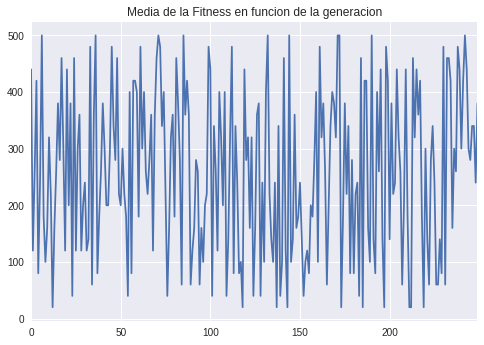

In [68]:
timeDf = pd.read_csv(results_path+"time", delimiter=";")
timeDf.drop(['Links'], axis=1)

ax = timeDf["Rows"].plot(logy=False)
plt.title(title)
plt.show()


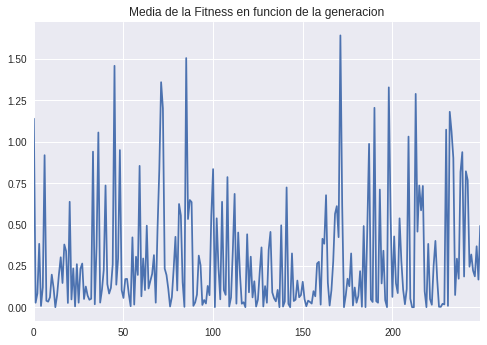